<font face="Chalkboard" color="blue" size=8>Methods for Time Series</font>

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
!pip install statsmodels==0.13.2

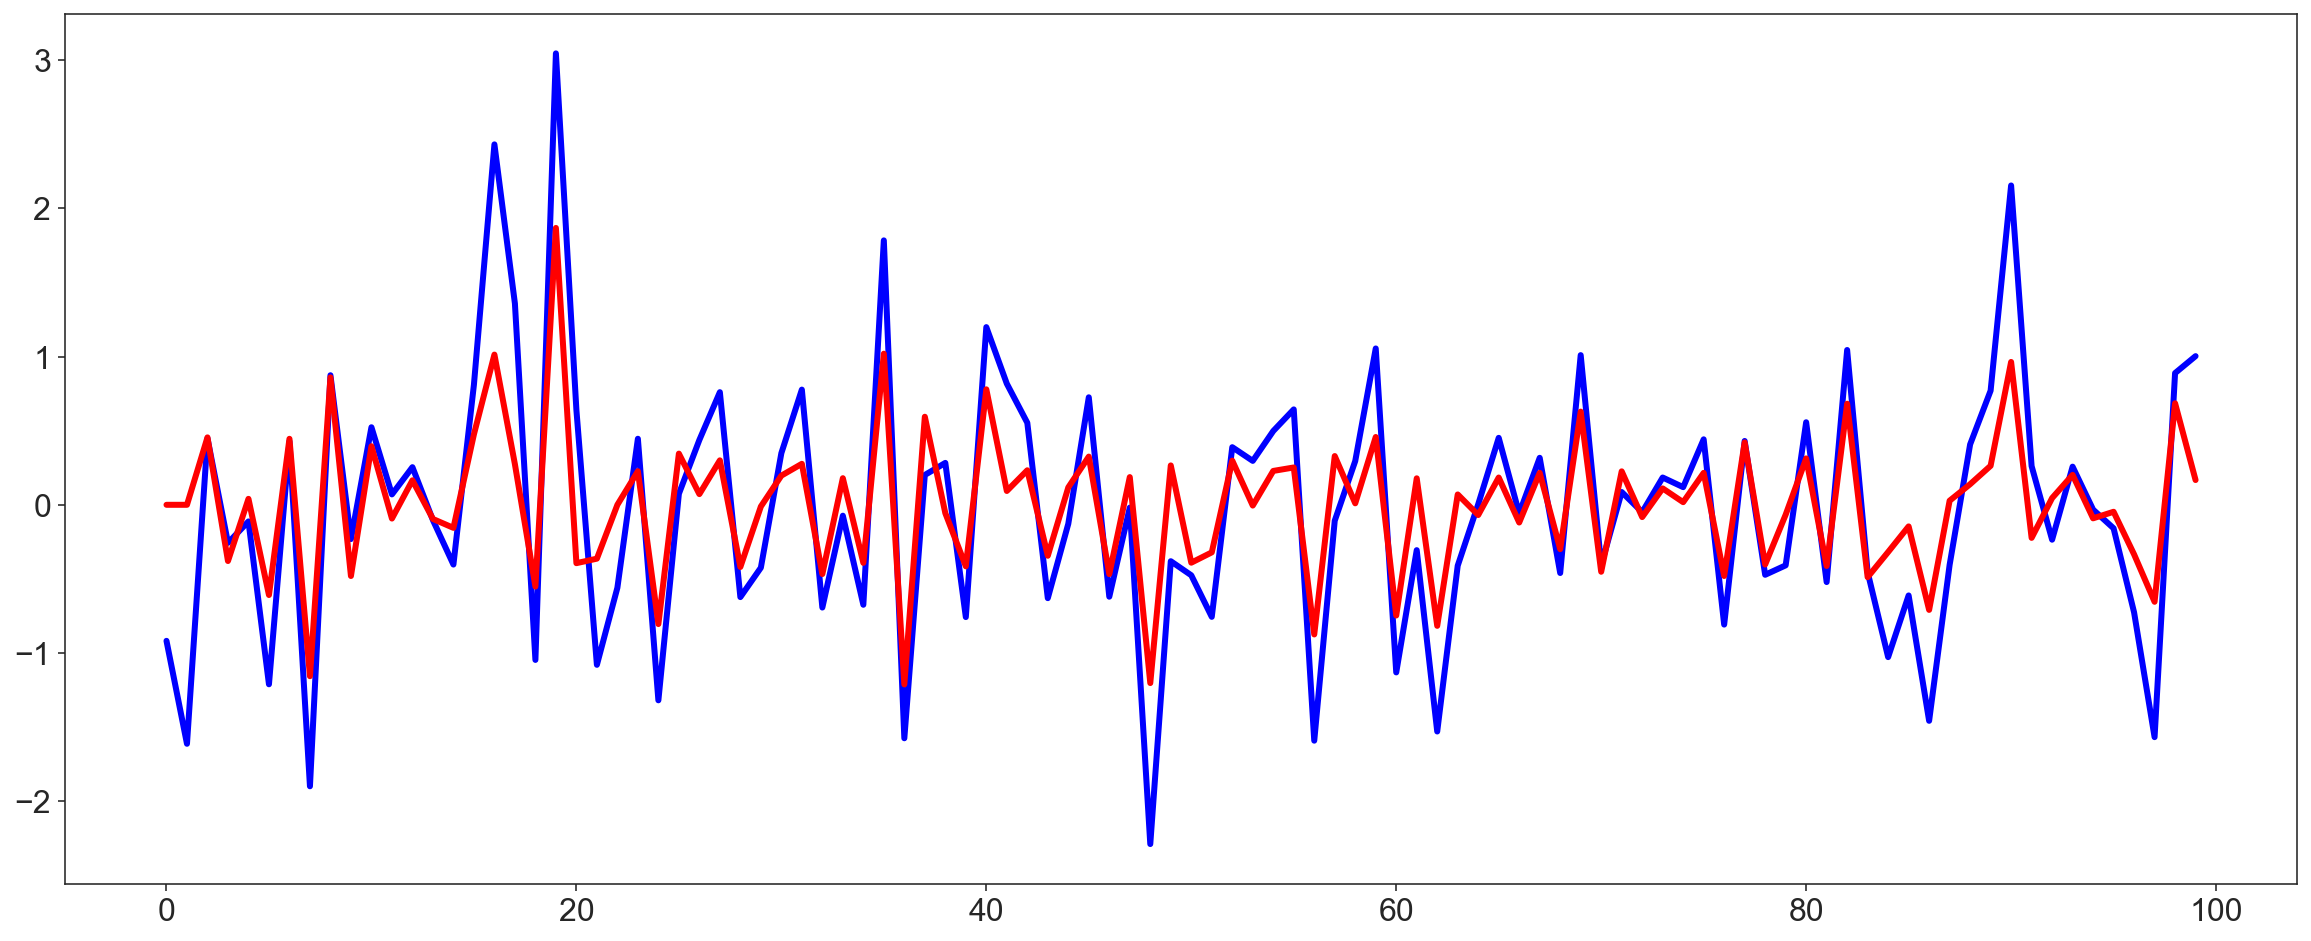

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

N = 100
x = np.random.randn(N)

# linear temporal dependency - we generate linearly correlated series saved as y
# Idea is simulate an "auto-regressive time series"
y = np.zeros(N)
for i in range(2, N):
    y[i] = 0.5 * x[i] - 0.2 * x[i-1] + 0.1 * x[i-2] 
    # Value of y depends on the value of x and the previous 2 values of x -- this is what auto-regressive means
    # Both X and Y are time series, but strongly correlated
    
font_size = 16
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.figure(figsize=(20,8))
plt.plot(x,lw=3, color='blue')
plt.plot(y,lw=3, color='red')
plt.show()

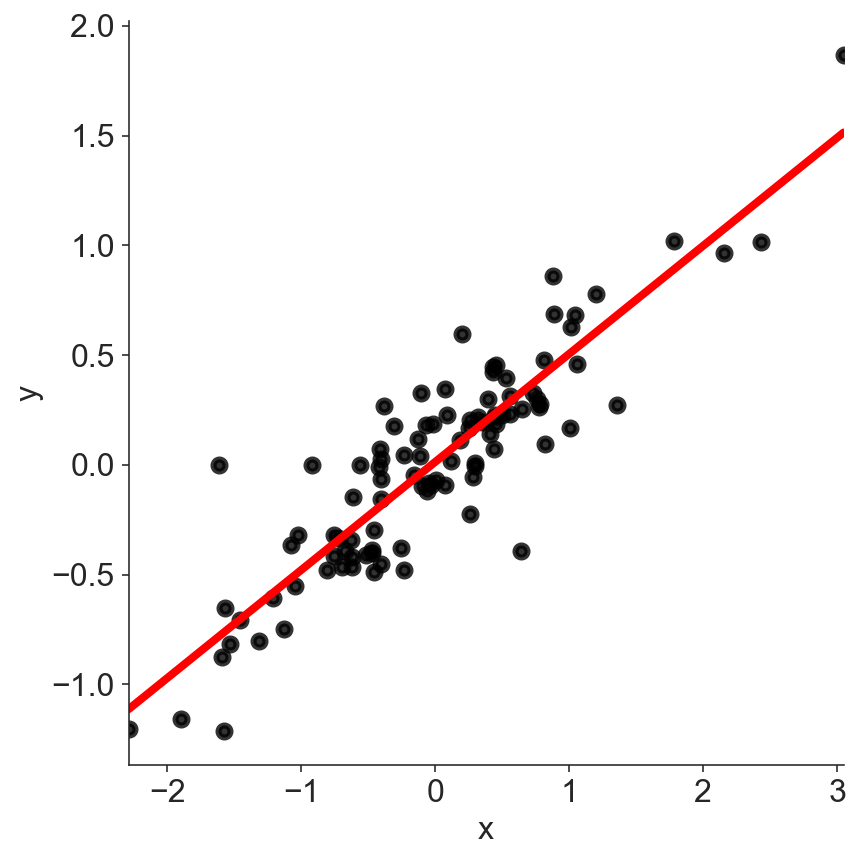

In [15]:
#Correlation plot to view the correlation between X and Y
sns.lmplot(x='x',y='y',data=pd.DataFrame({'x':x,'y':y}),ci=None,scatter_kws={'color':'black','lw':3},line_kws={'color':'red','lw':4},height=6)
plt.show()

## Example of Nonlinear Dependency

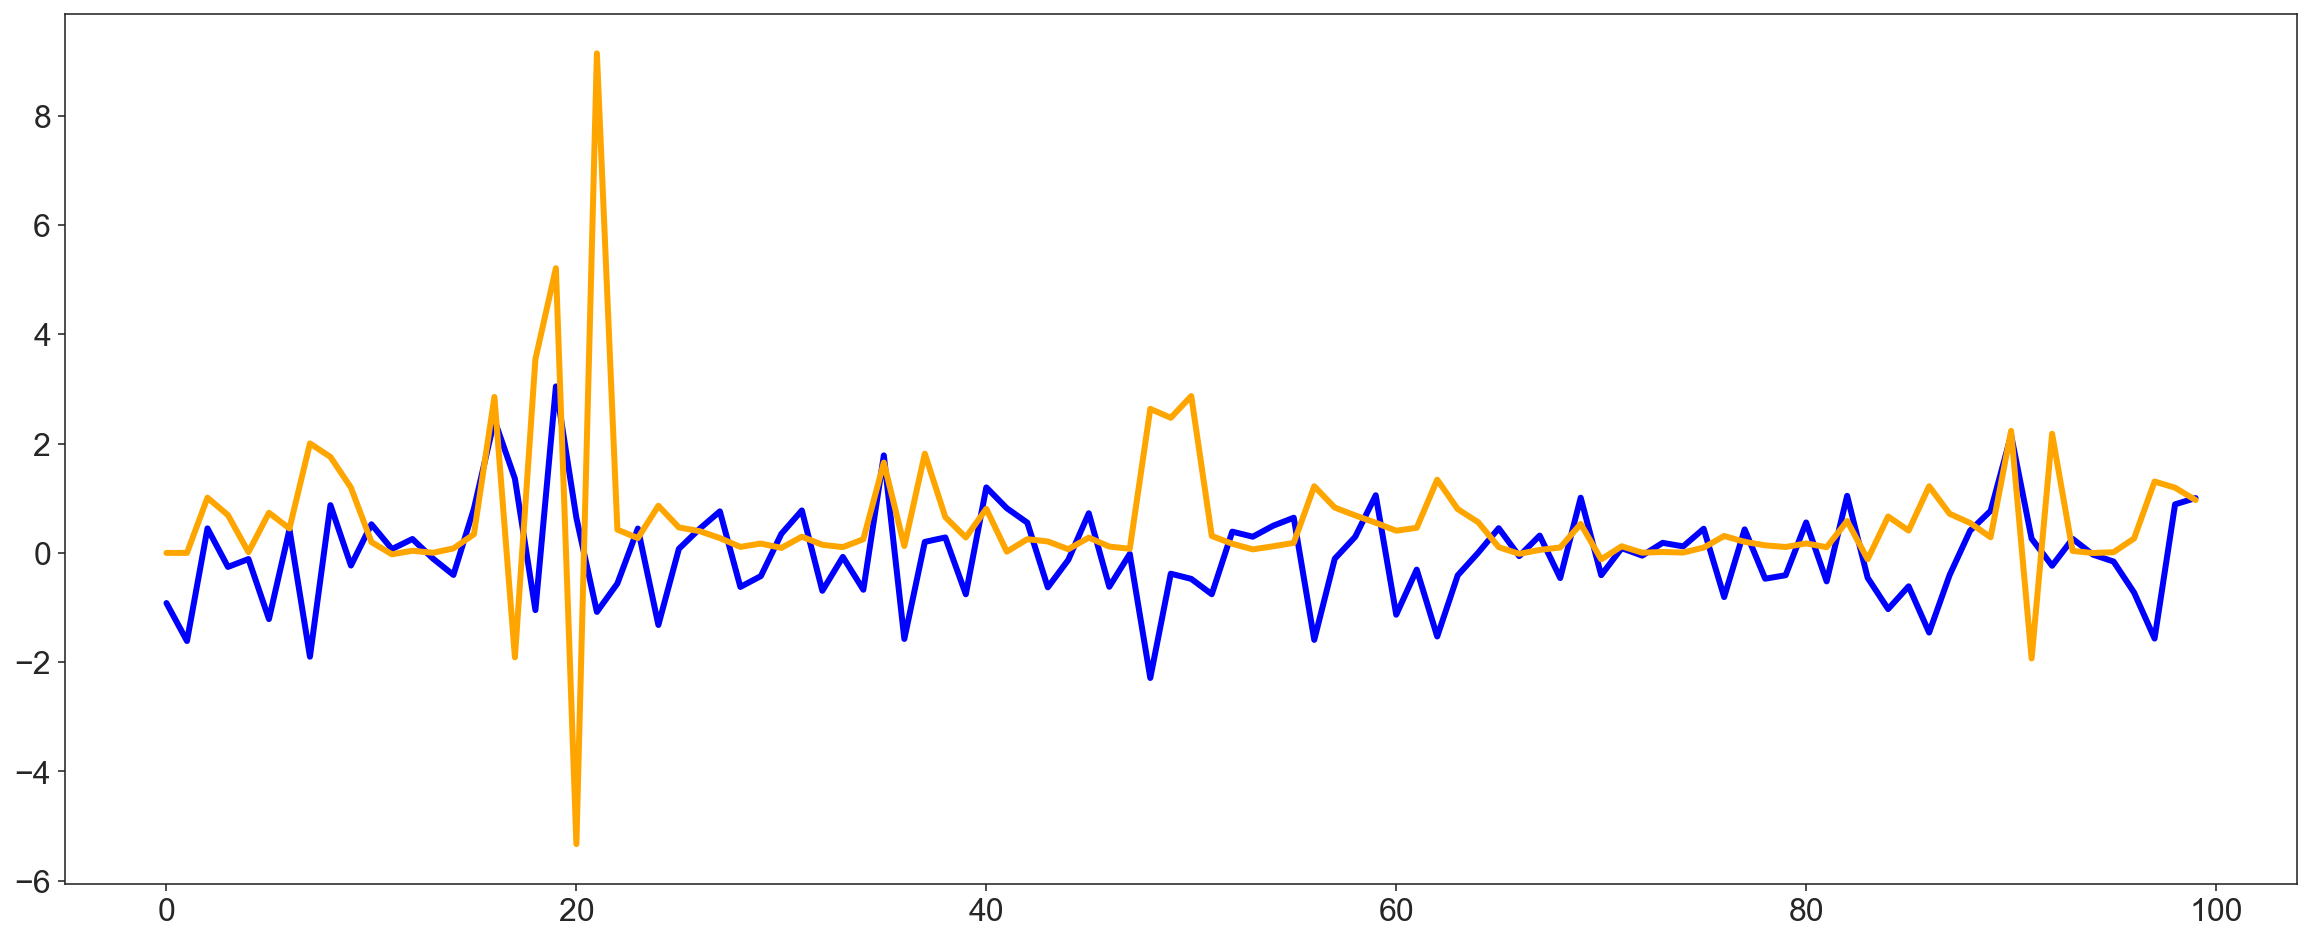

In [20]:
u = np.zeros(N)
for i in range(2, N):
    u[i] = 0.5 * x[i] ** 2 - 0.2 * x[i-1] ** 3 + 0.1 * x[i-2] ** 4
    
font_size = 16
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.figure(figsize=(20,8))
plt.plot(x,lw=3, color='blue')
plt.plot(u,lw=3, color='orange')
plt.show()

## Autoregressive Models {.build}


**Time Series Data:** observations of a random variable at different points in time. The data values are indexed in time order, for example:
$$\large{
y_{t_1}, y_{t_2}, y_{t_3},... y_{t_n}}
$$
We can also *see* the data in retrospect:

$$\large{
y_{t-n},... y_{t-3},y_{t-2}, y_{t-1},y_{t}}
$$






**Assumptions:** 

- Future values depend on the previously occurred ones.

- The data is observed at evenly spaced times, for example daily, weekly, monthly etc.



#### Example of Autoregressive model

$$\large{
y_t = \beta_0+\beta_1 y_{t-1} +\epsilon_{t}}
$$

In this model the response variable in the previous time period becomes the predictor and the errors typically are assumed to be independent and identically distributed.


**The k-th order autoregression AR(k) model** is 
$$\large{
y_t = \beta_0+\beta_1 y_{t-1} + \beta_2 y_{t-2} + ... \beta_k y_{t-k} + \epsilon_{t}}
$$


#### ARMA (AutoRegressive - Moving Average) Model

$$\large{
y_t = \beta_0+\beta_1 y_{t-1} + \beta_2 y_{t-2} + ... \beta_k y_{t-k} + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + ... \theta_q\epsilon_{t-q}}
$$
This means we need to solve for all $\beta$ and $\theta$. We are essentially treating both the variables and the noise as time series.

The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF), for example :
$$
{Corr}(y_t,y_{t−k})
$$
where $\text{Corr}$ denotes the Pearson correlation function.

If we assume an **AR(k)** model and we want to filter out the linear influence of the random variables that lie in between $y_{t-1}$ and $y_{t-(k-1)}$, which requires a transformation on the time series, we obtain the *partial autocorrelation function.* 


**Important aspects:**

- *Level*: the average value in the time series
- *Trend*: the increasing or decreasing behavior in the time series.
- *Seasonality*: the repeating cycles, the periodicity in the time series.
- *Noise*: the random variations in the time series.


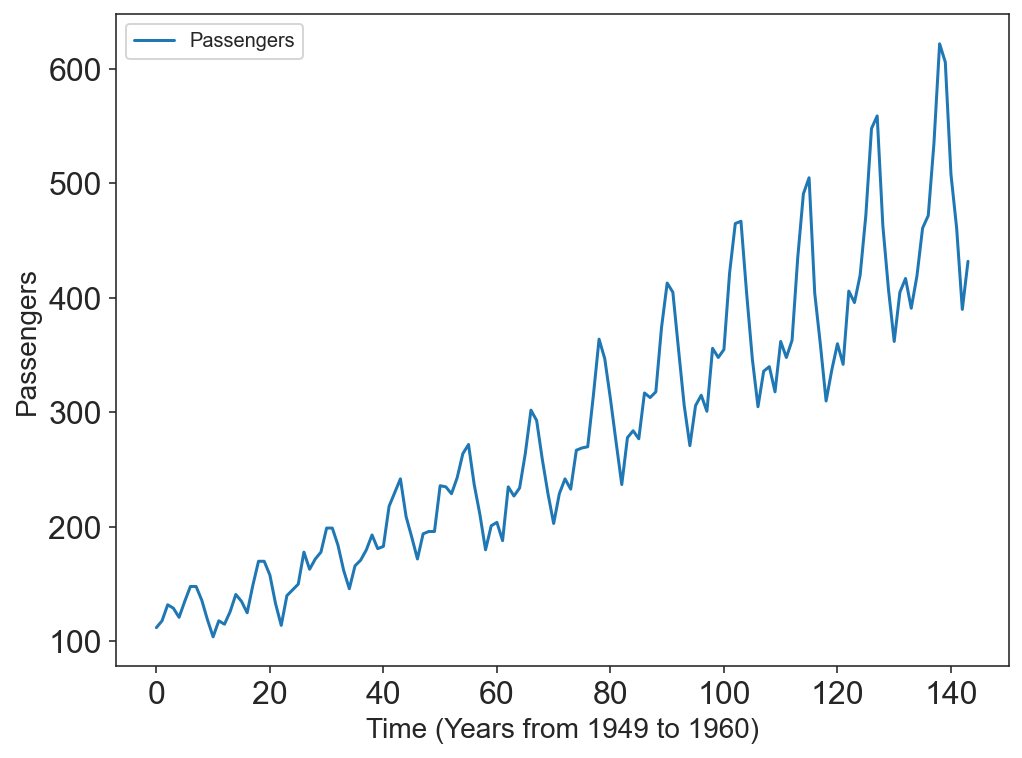

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

series = pd.read_csv('Data/airline-passengers.csv')
series.plot(figsize=(8,6),fontsize=16)
plt.xlabel('Time (Years from 1949 to 1960)', size=14)
plt.ylabel('Passengers', size=14)
plt.show()

In [31]:
series

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [33]:
series['Month'] = pd.to_datetime(series['Month'])
series.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [34]:
series = series.set_index('Month')

In [35]:
series.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [36]:
series.index < '1957-07-01'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

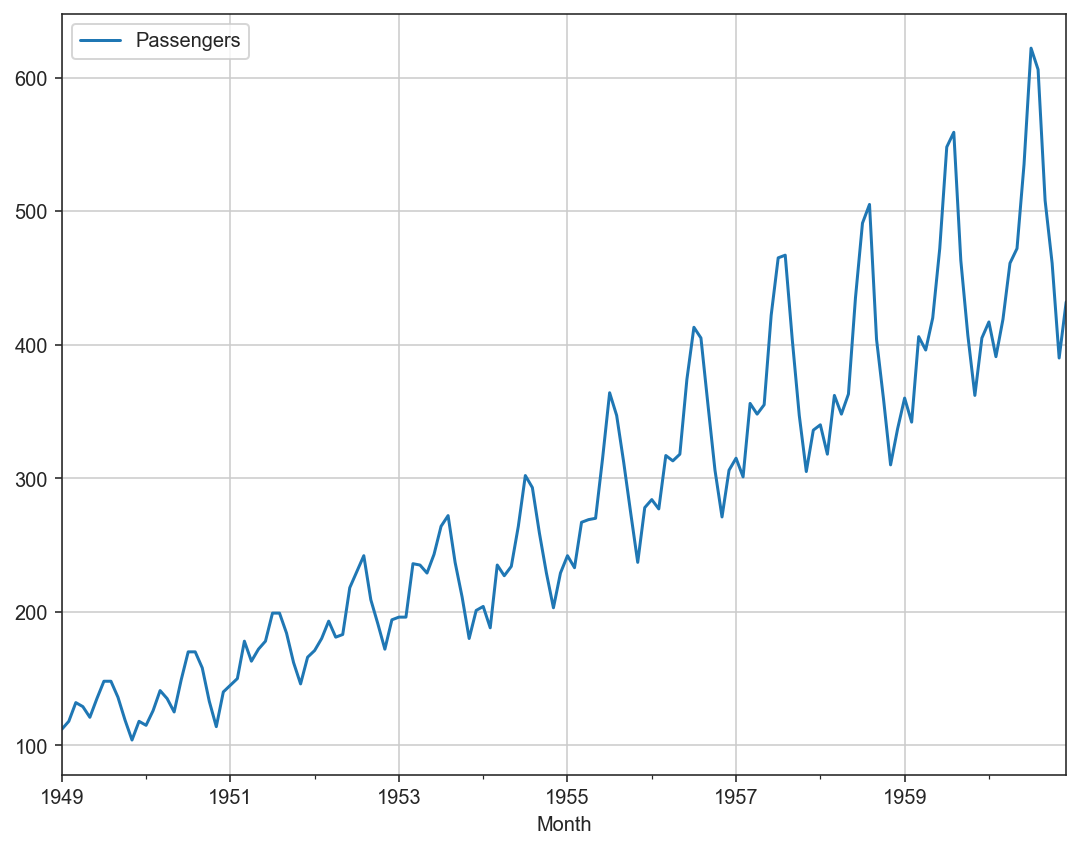

In [37]:
series.plot(grid=True,figsize=(9,7))
plt.show()

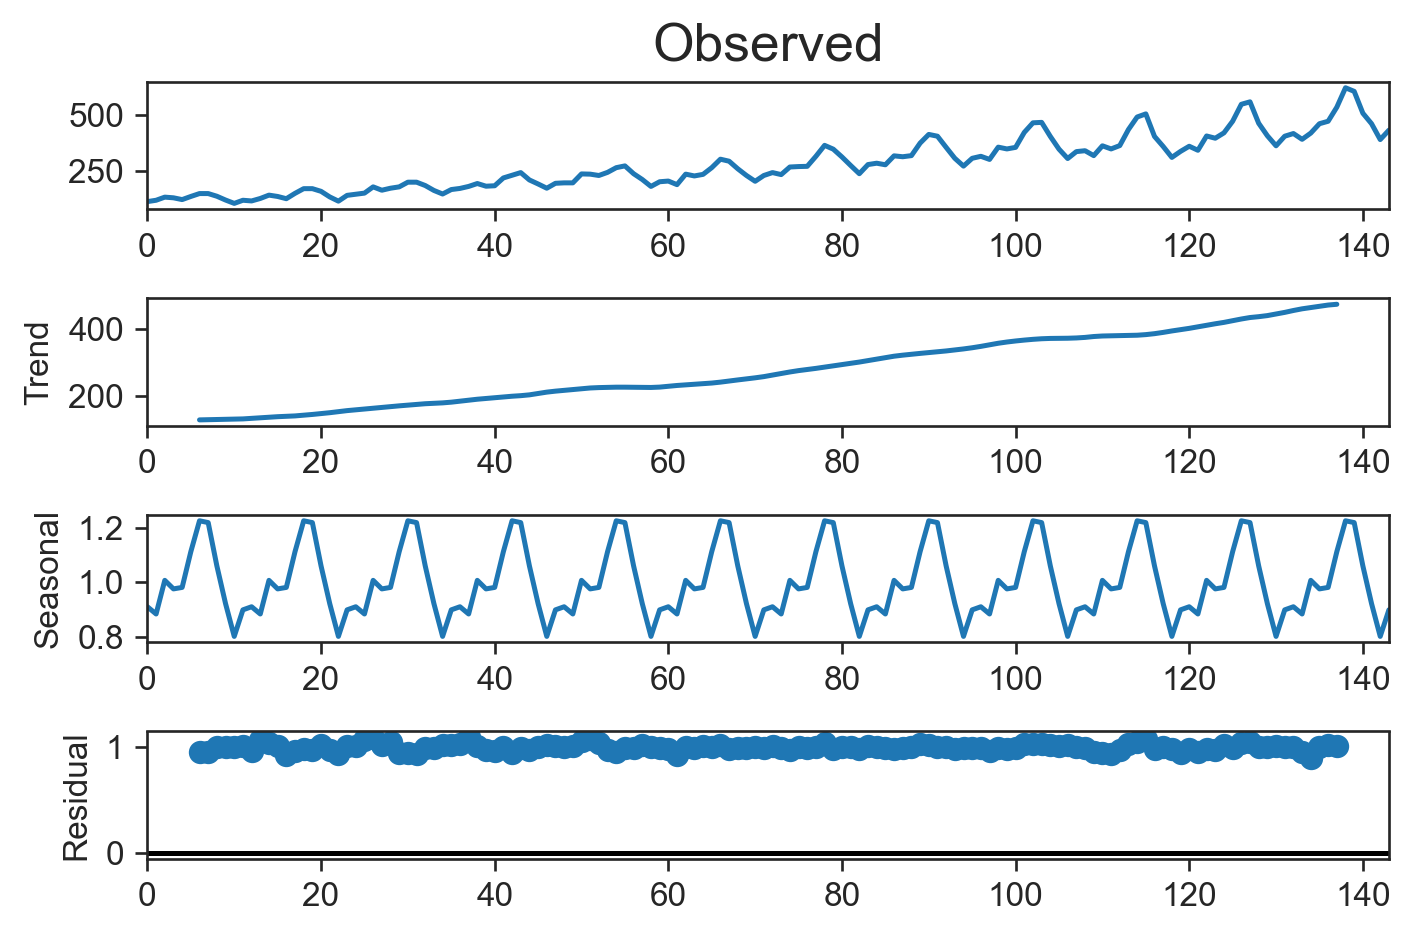

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
result = seasonal_decompose(series['Passengers'].values, model='multiplicative', period=12)
result.plot()
plt.show()

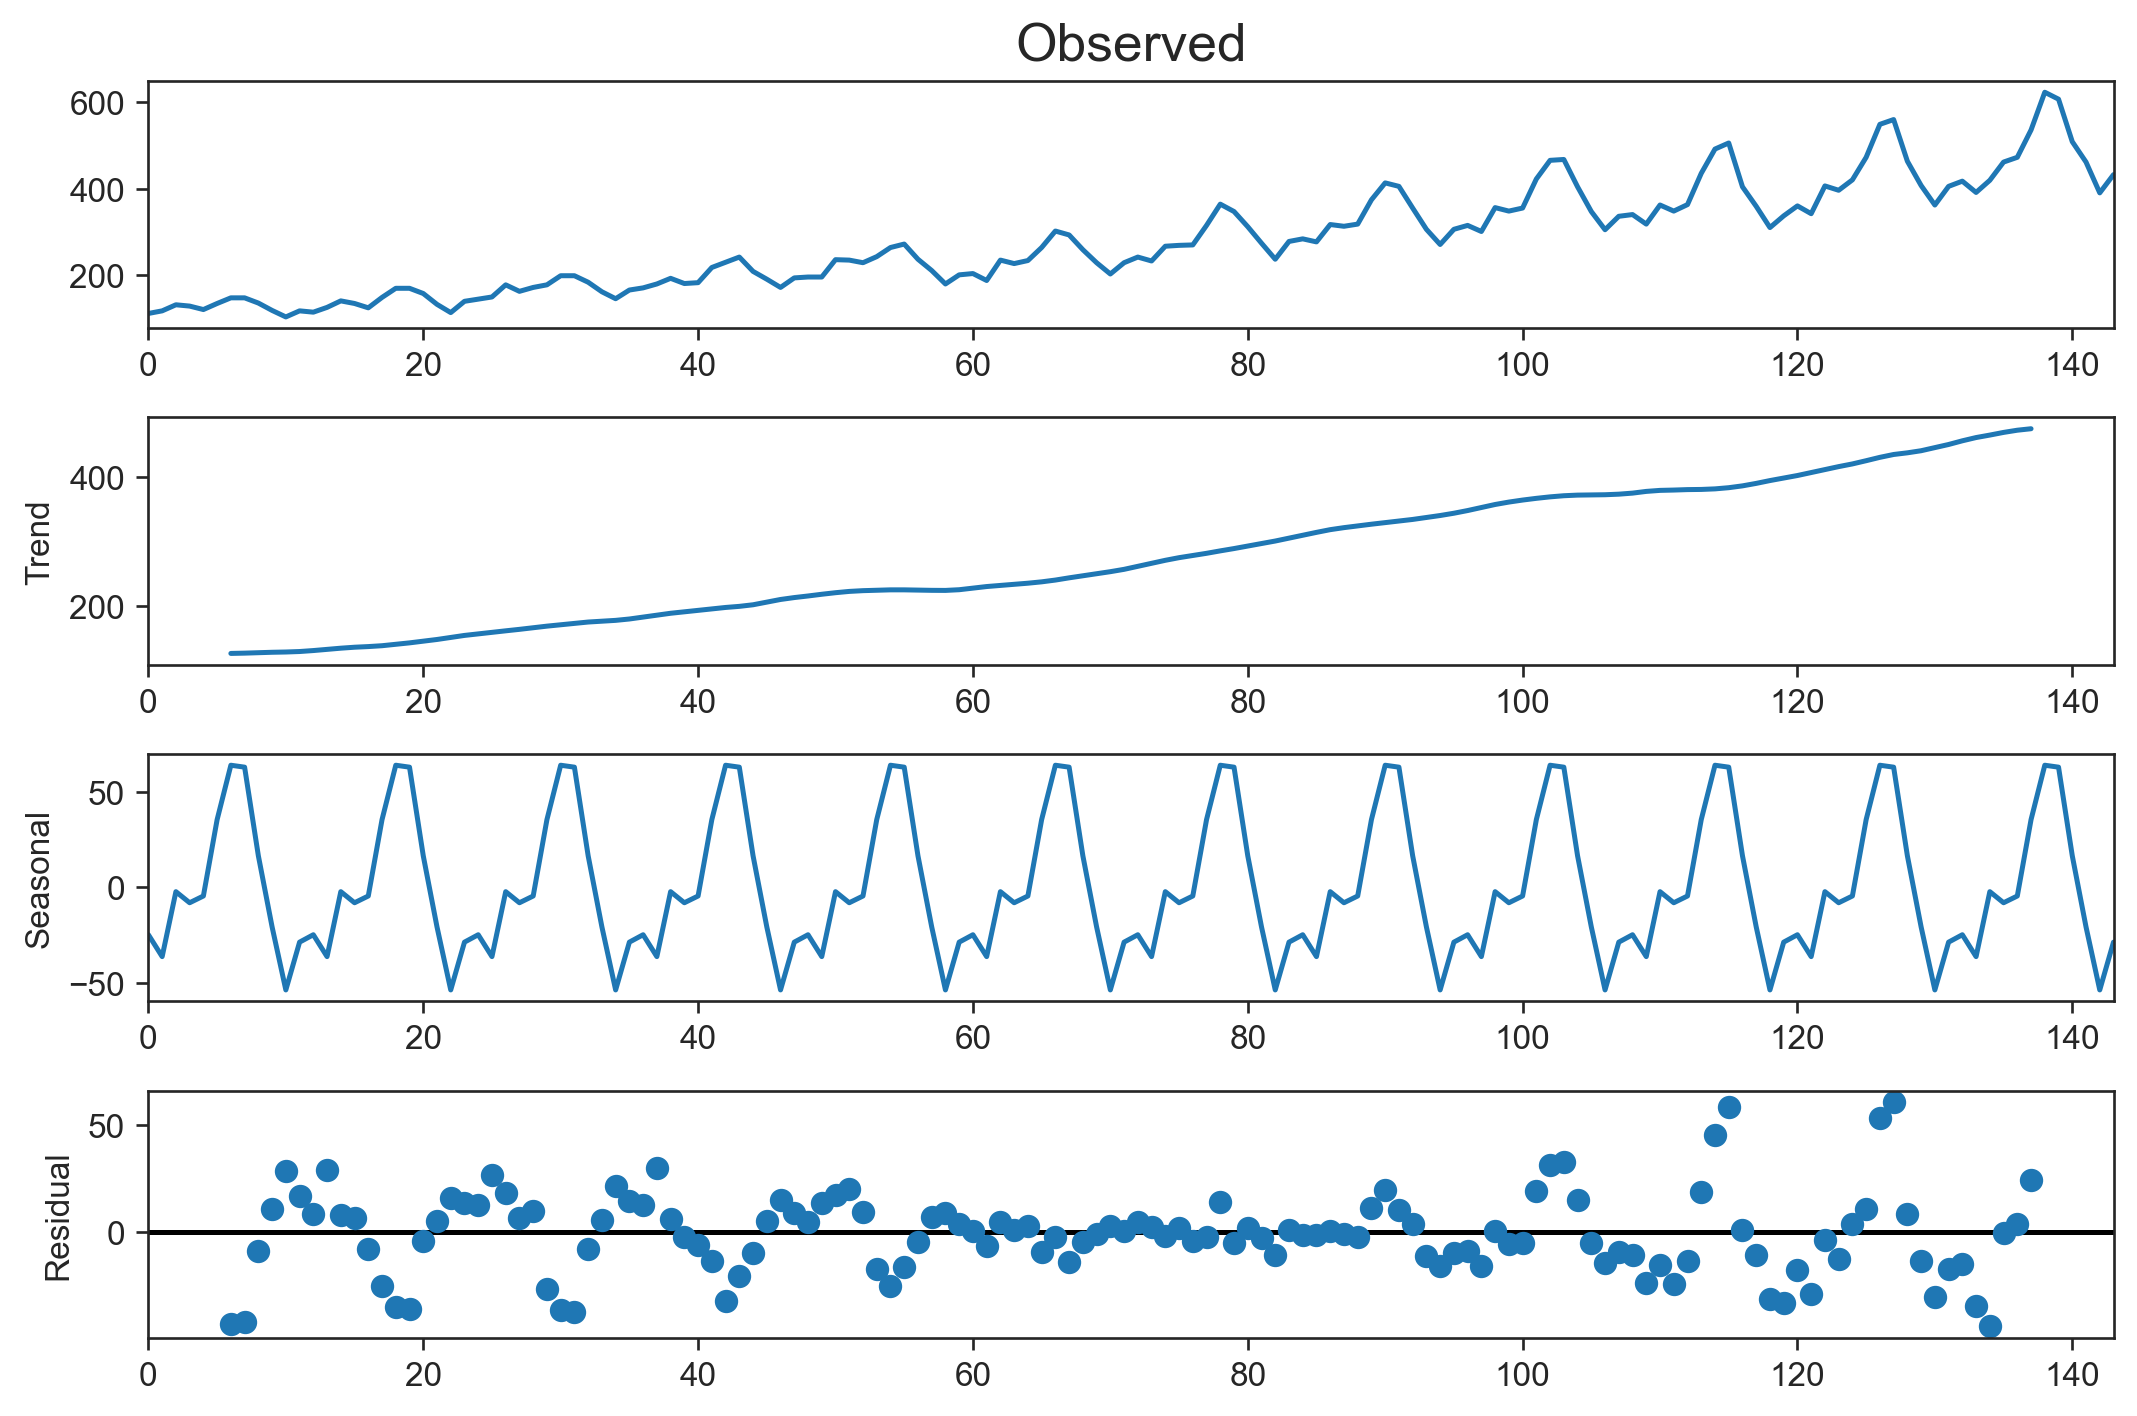

In [45]:
result = seasonal_decompose(series.values, model='additive', period=12)
plt.rcParams['figure.figsize'] = [9.0,6.0]
result.plot()
plt.show()

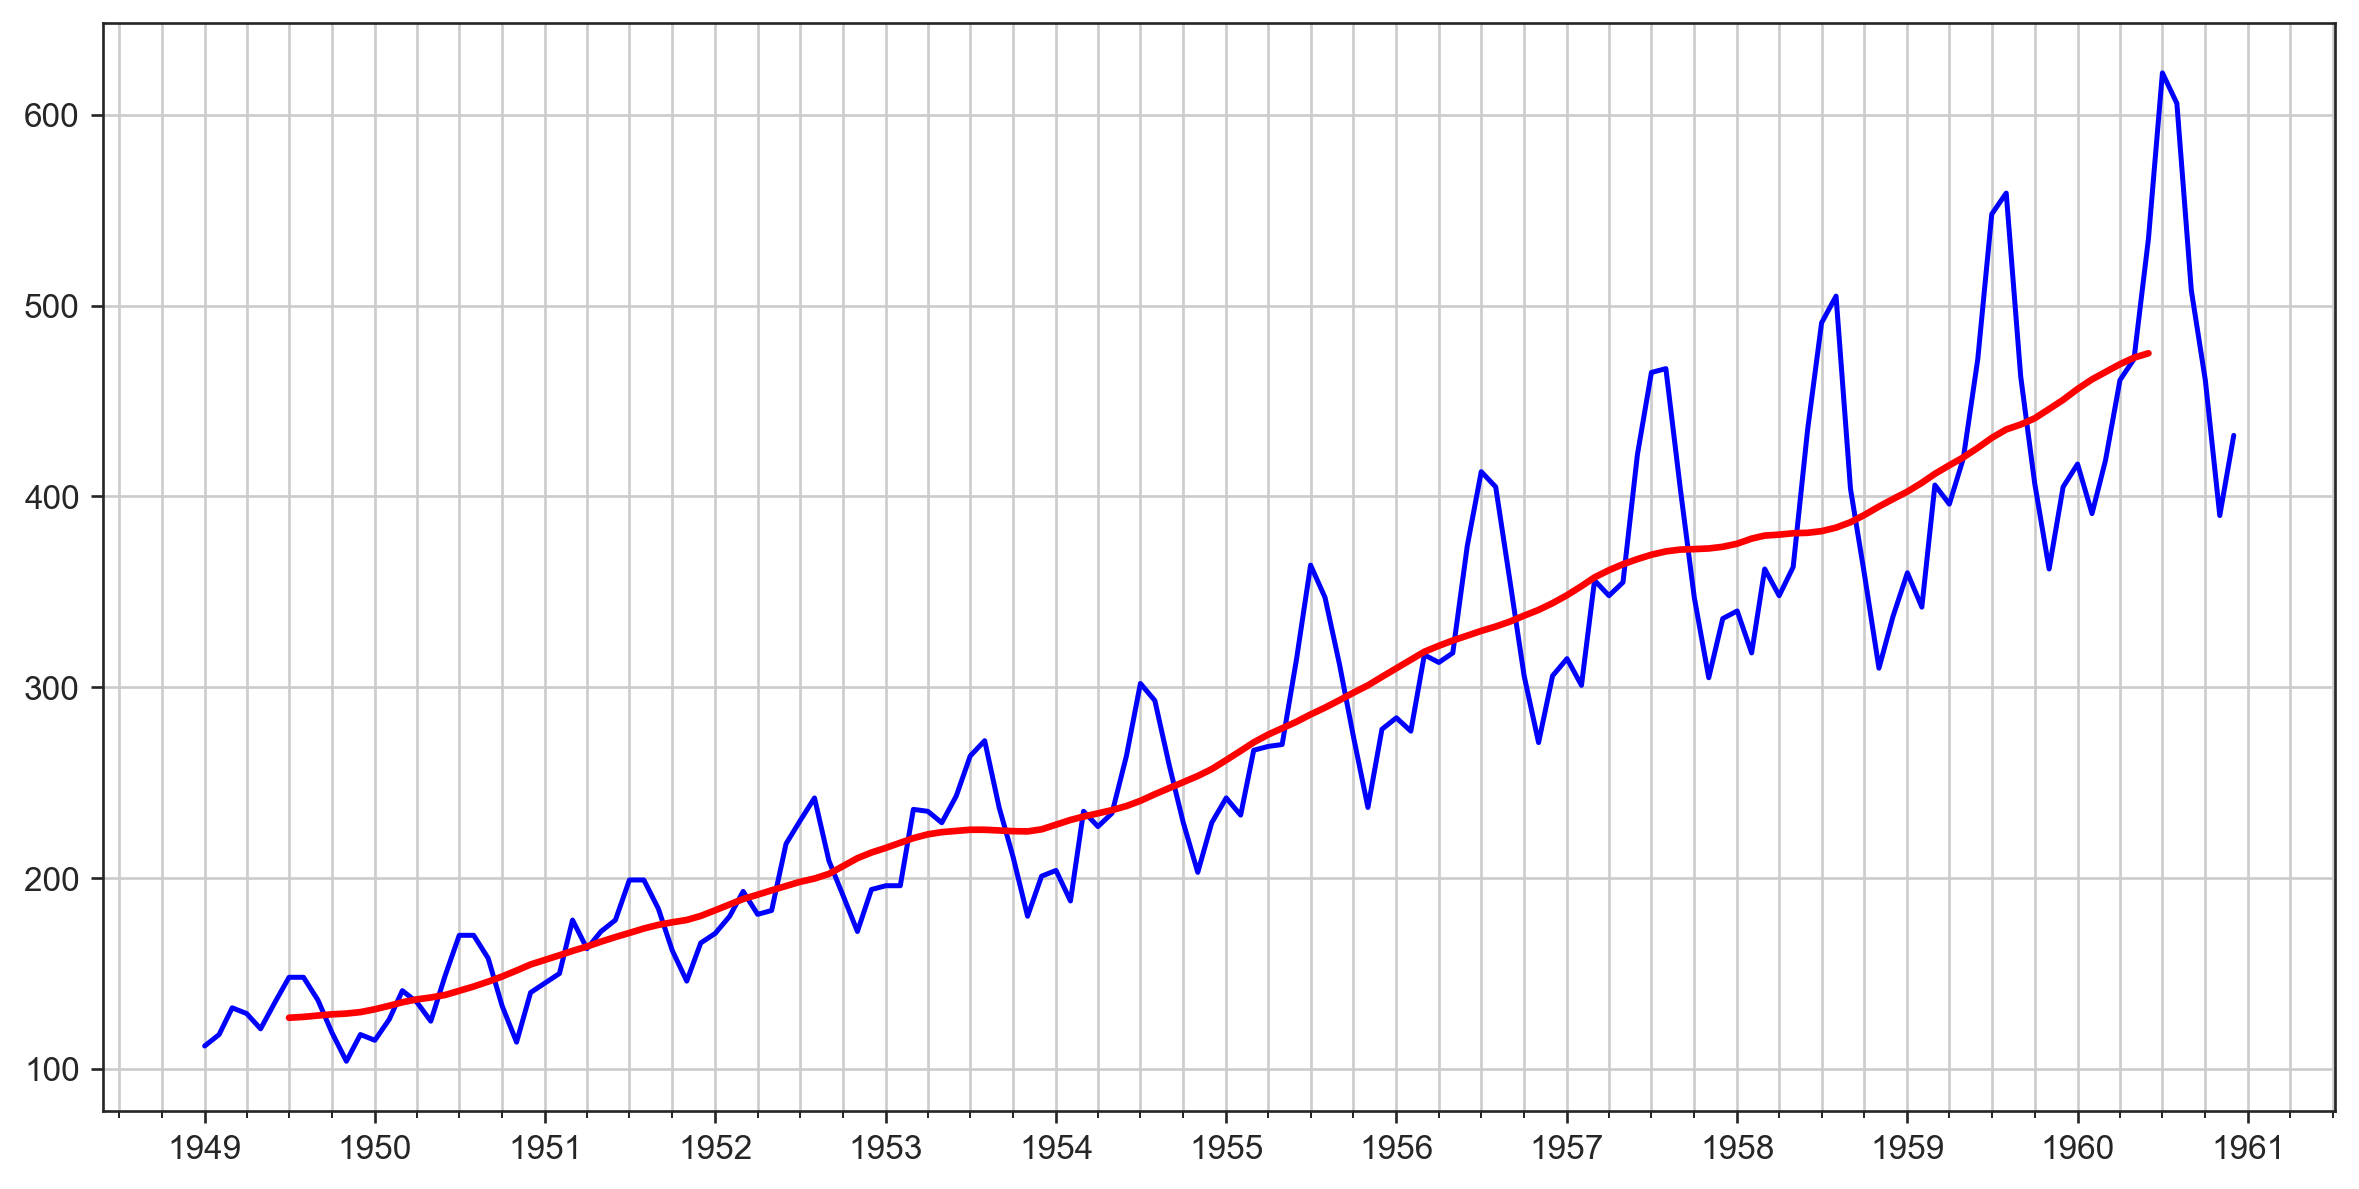

In [46]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12,6))
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(series.index, series['Passengers'], c='blue')
plt.plot(series.index, result.trend, c='red',lw=2)

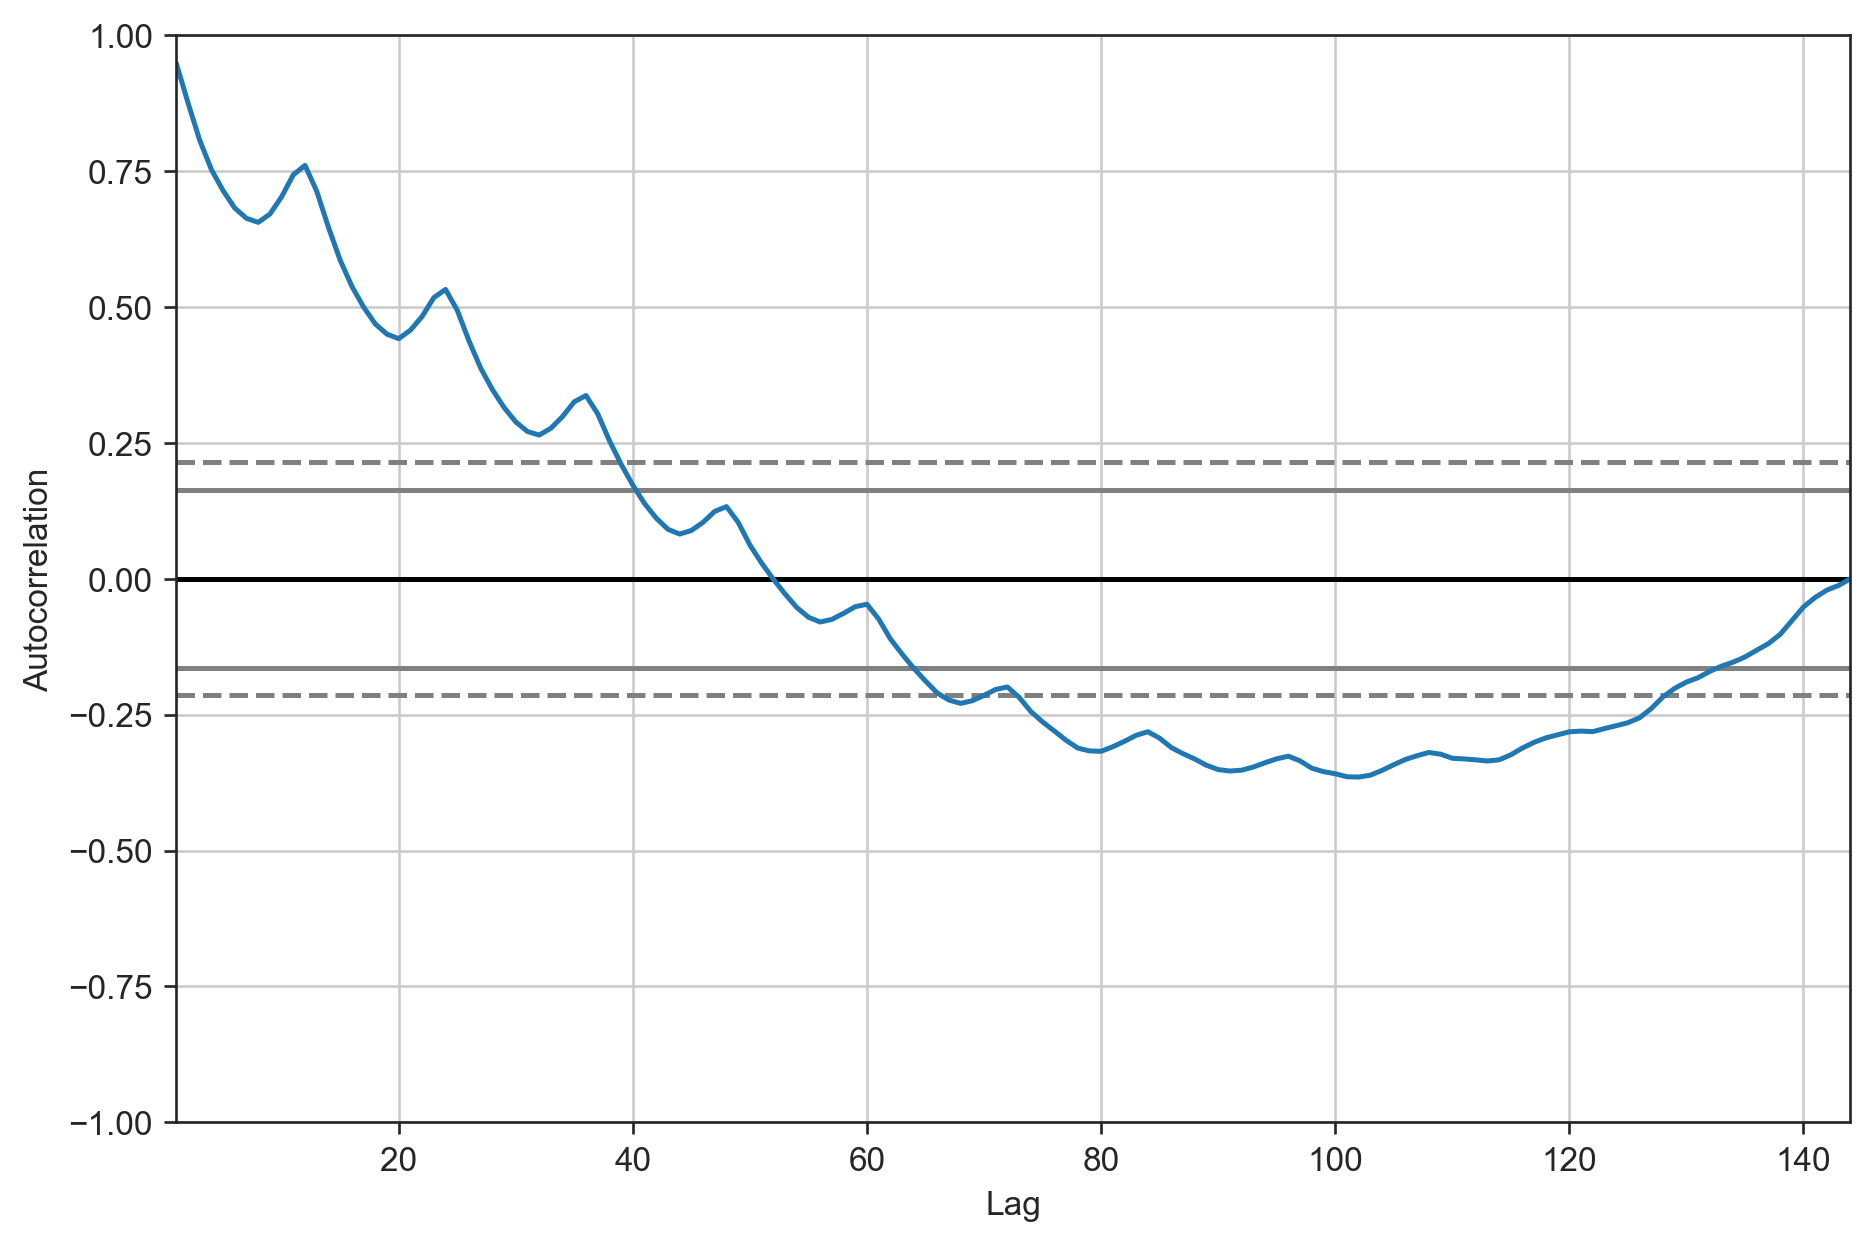

In [49]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error as mse
from pandas.plotting import autocorrelation_plot

mpl.rcParams['figure.dpi'] = 120
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

autocorrelation_plot(series)
plt.show()

The above plot tells you how well correlated the value for a given time lag (how many time periods back the value is) is with the target variable. So we want the HIGHEST auto correlation, here it looks like a good choice is around 12 months (makes sense)

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -682.543
Date:                Mon, 04 Apr 2022   AIC                           1377.086
Time:                        14:52:10   BIC                           1394.863
Sample:                    01-01-1949   HQIC                          1384.310
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2580      0.135      1.914      0.056      -0.006       0.522
ar.L2          0.3732      0.136      2.736      0.006       0.106       0.641
ar.L3         -0.3367      0.125     -2.684      0.0

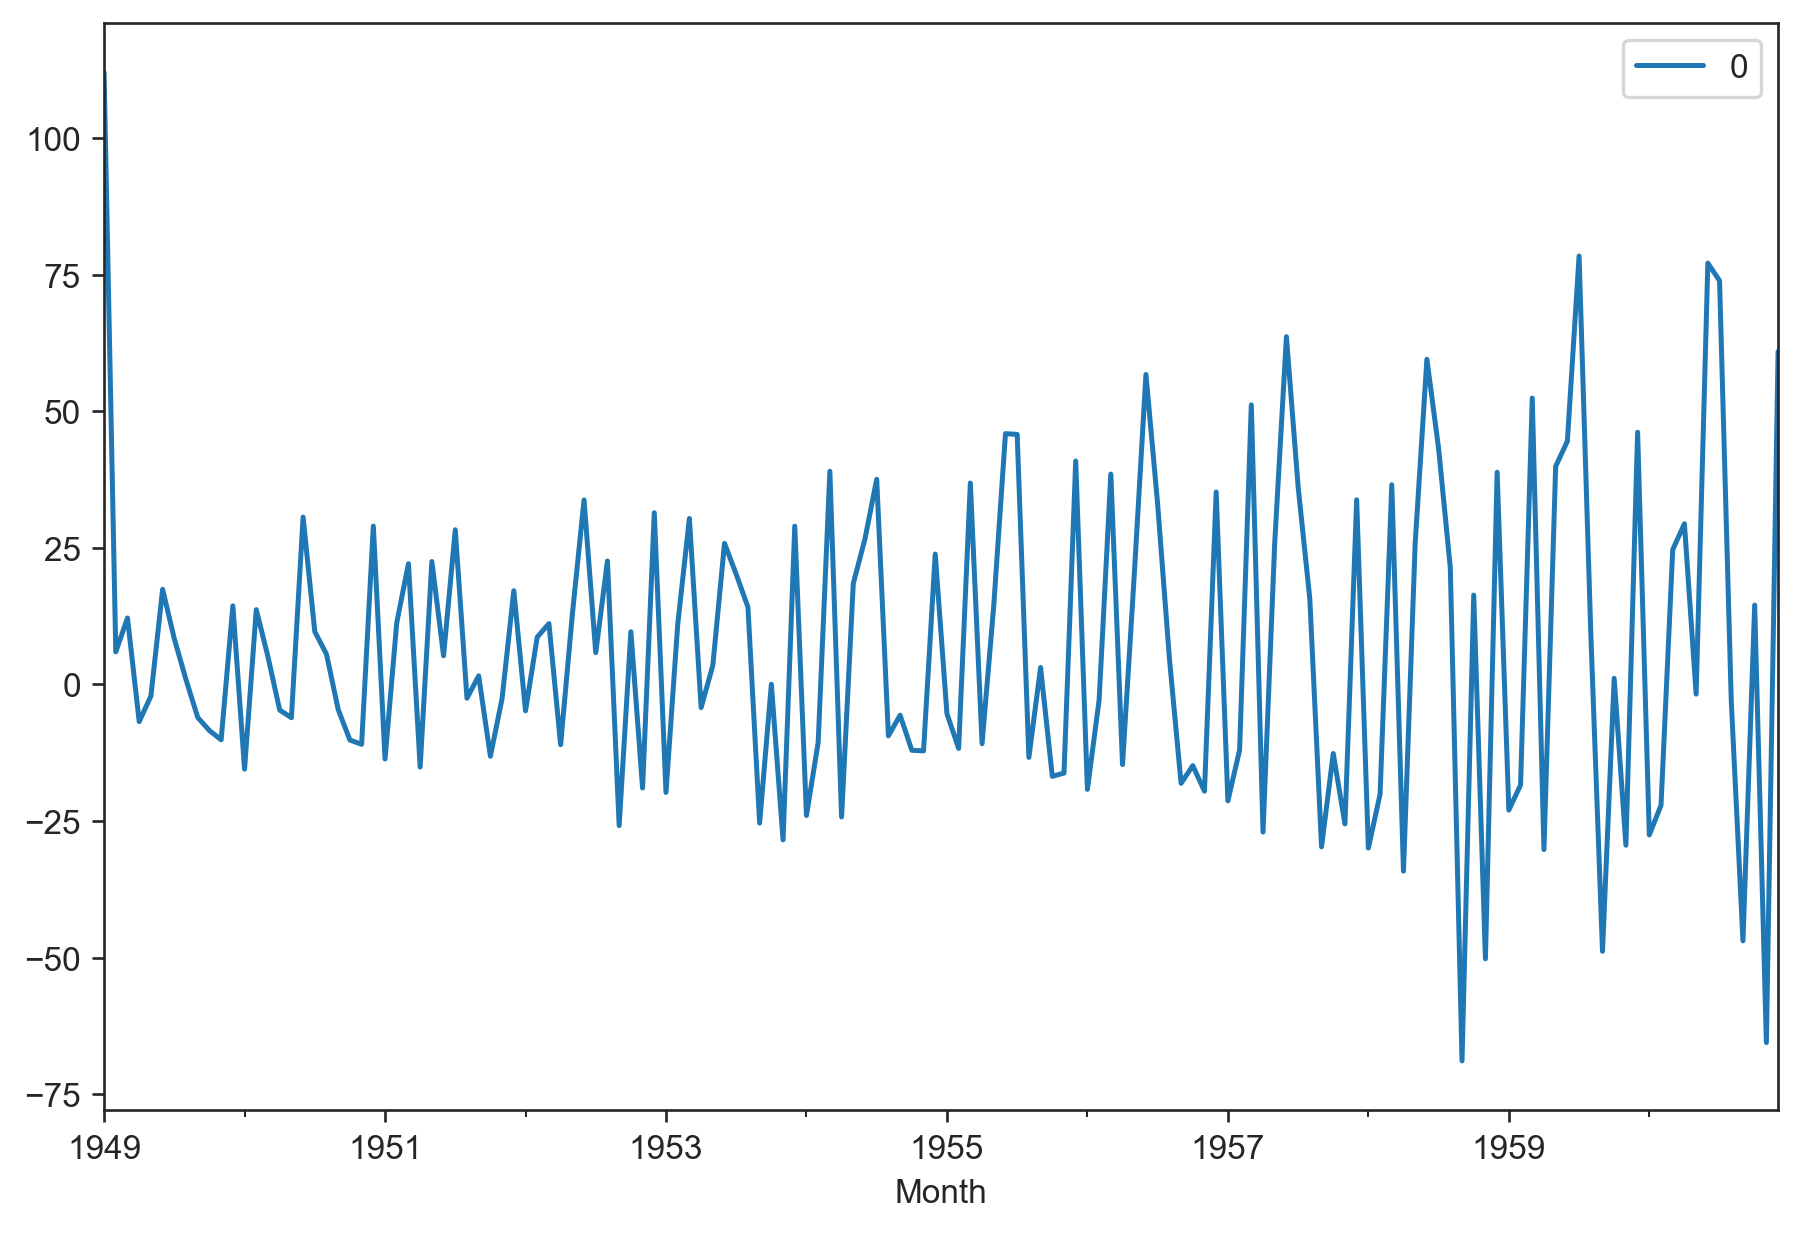

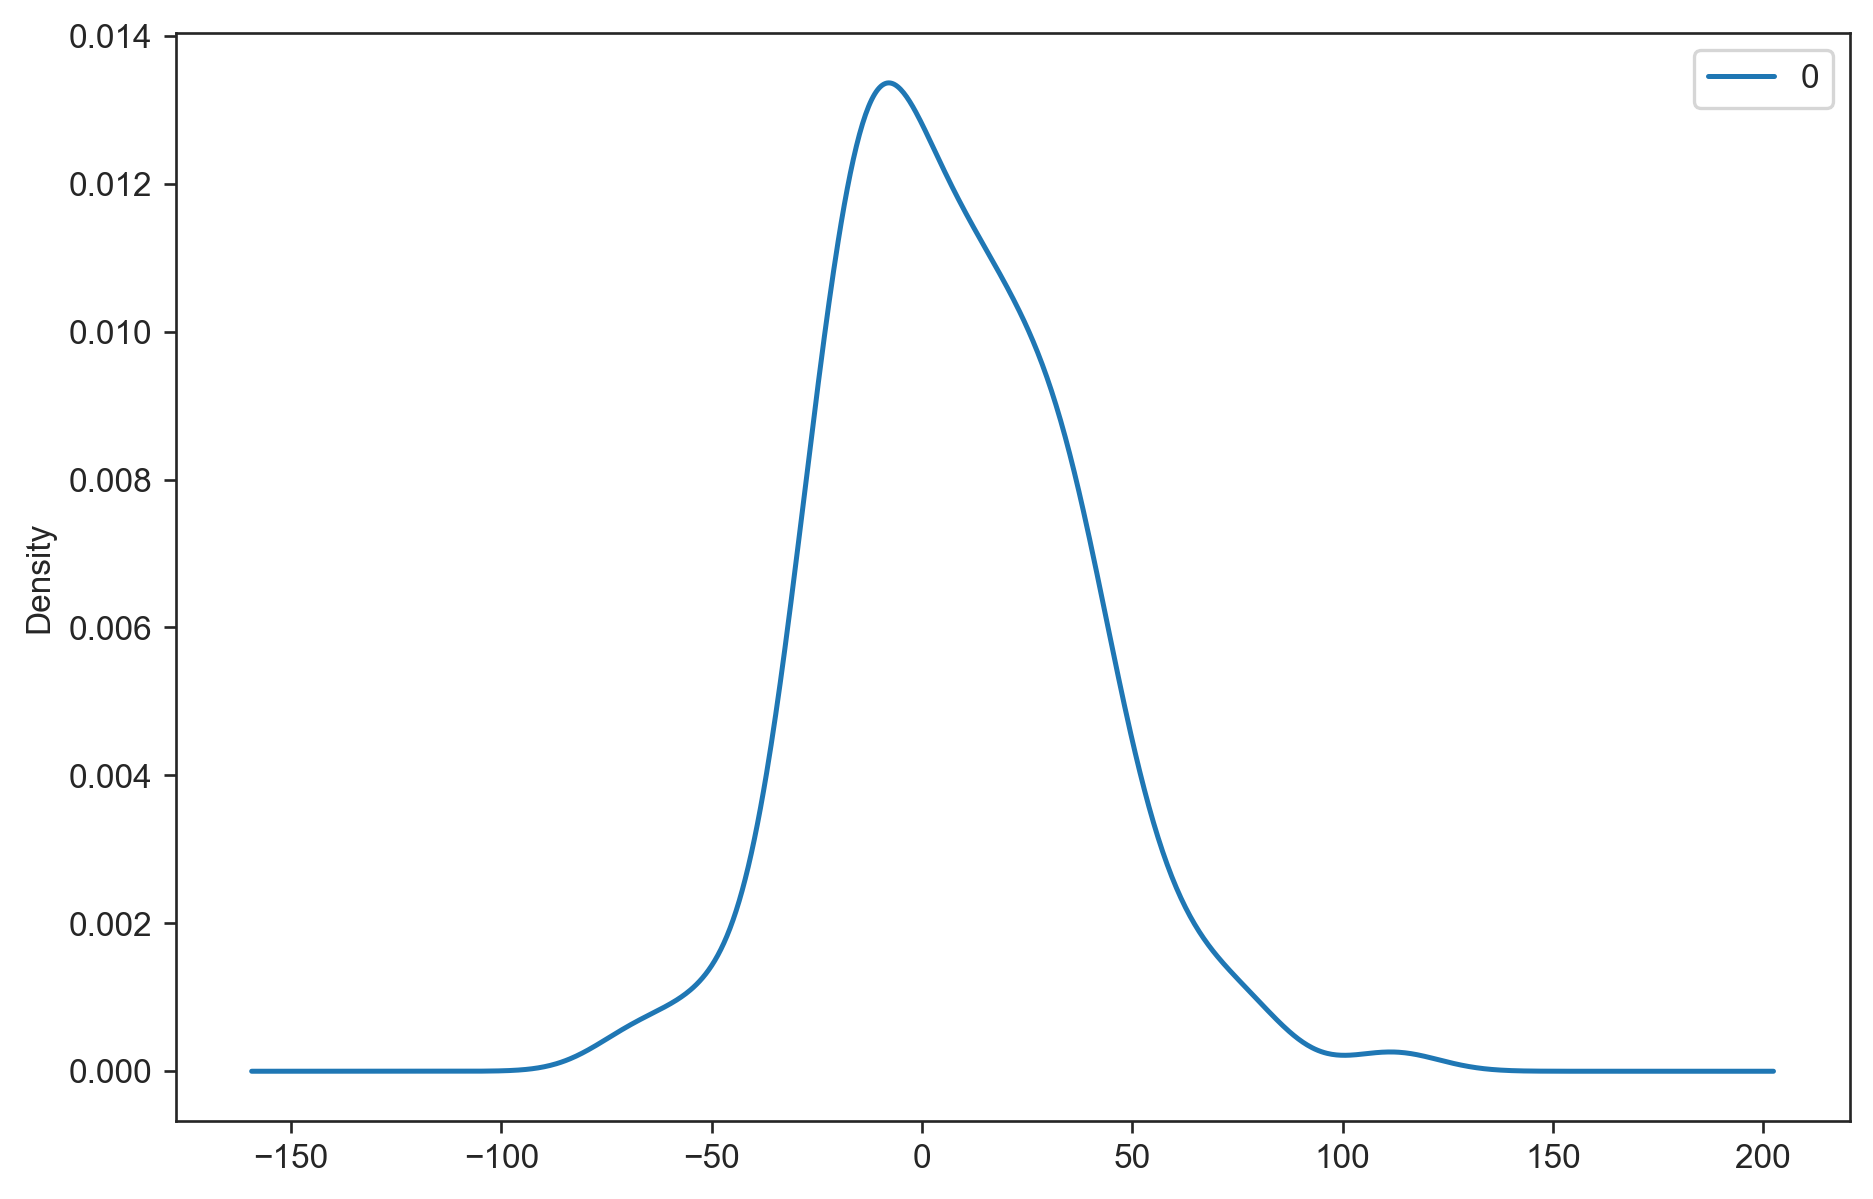

                0
count  144.000000
mean     6.969851
std     29.188047
min    -68.901652
25%    -13.192494
50%      4.979949
75%     26.095304
max    112.000000


In [52]:
import warnings
warnings.filterwarnings("ignore")

model = ARIMA(series, order=(3,1,2))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## AN important idea is "heteroskedasticity" i.e. the variance of the dependent variable is increasing when the input variable (time) increases

In [ ]:
resid = residuals.values

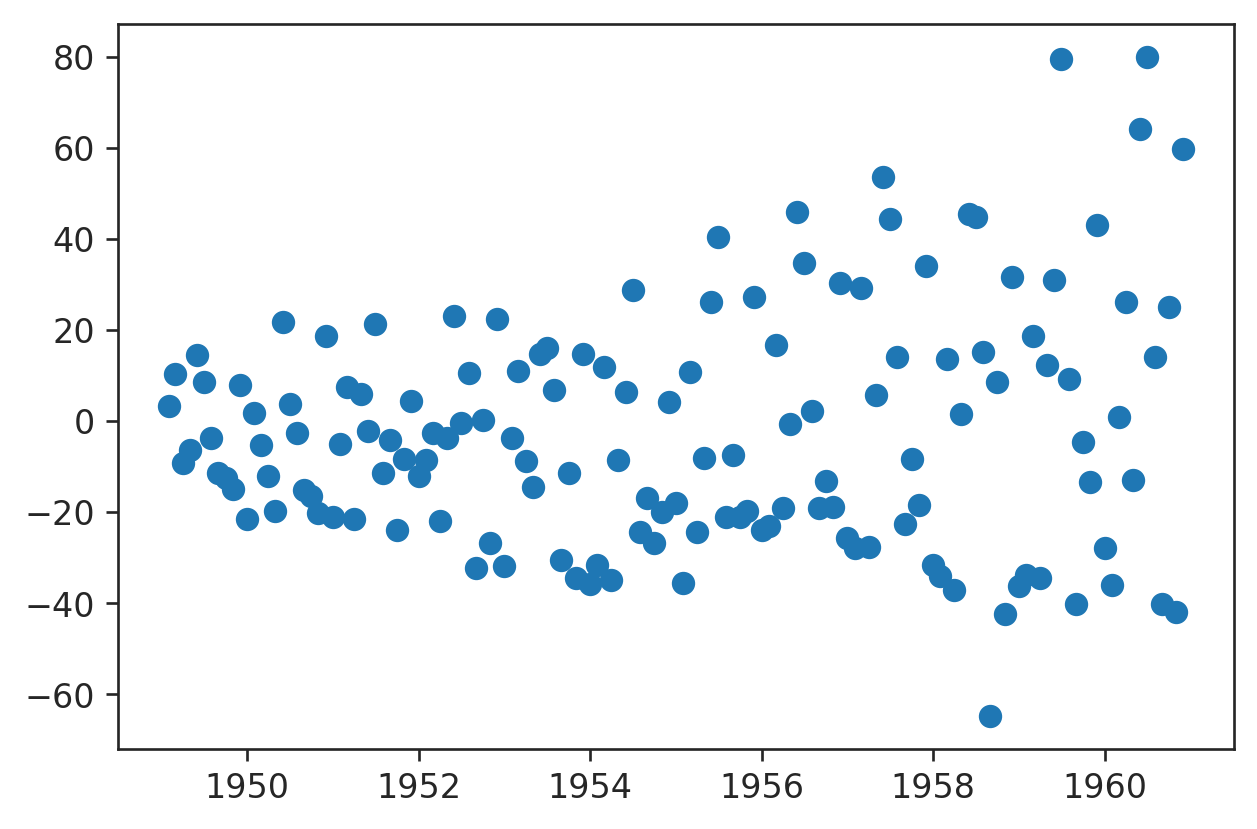

In [ ]:
fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(residuals.index,resid)

In [ ]:
series = pd.read_csv('drive/MyDrive/Data Sets/penguins.csv')
series['Month'] = pd.to_datetime(series['Month'])
series

,Month,Number
0,2000-01-01,753
1,2000-02-01,448
2,2000-03-01,356
3,2000-04-01,504
4,2000-05-01,698
...,...,...
79,2006-08-01,301
80,2006-09-01,389
81,2006-10-01,624
82,2006-11-01,748


In [ ]:
series = series.set_index('Month')
series

,Number
Month,
2000-01-01,753
2000-02-01,448
2000-03-01,356
2000-04-01,504
2000-05-01,698
...,...
2006-08-01,301
2006-09-01,389
2006-10-01,624


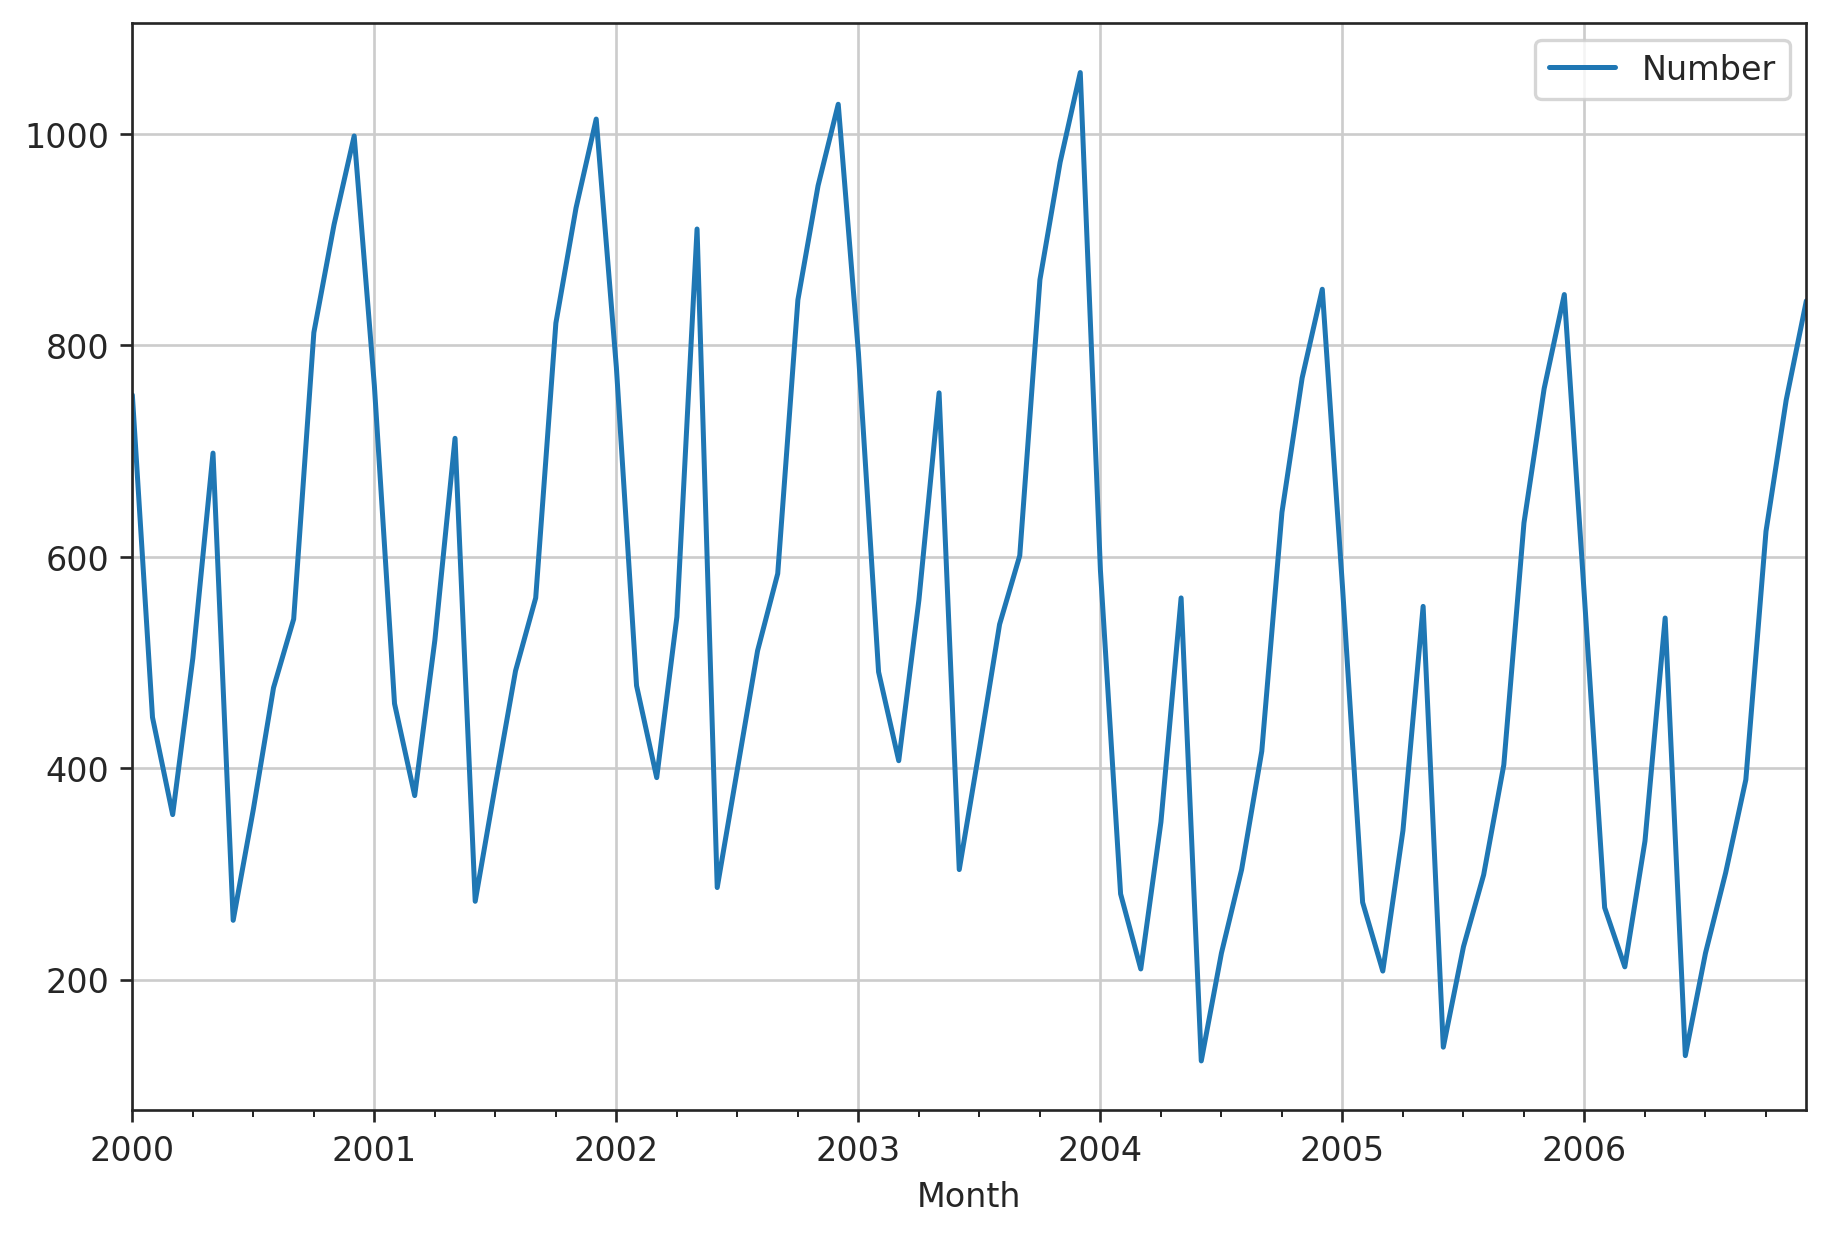

In [ ]:
series.plot(grid=True)

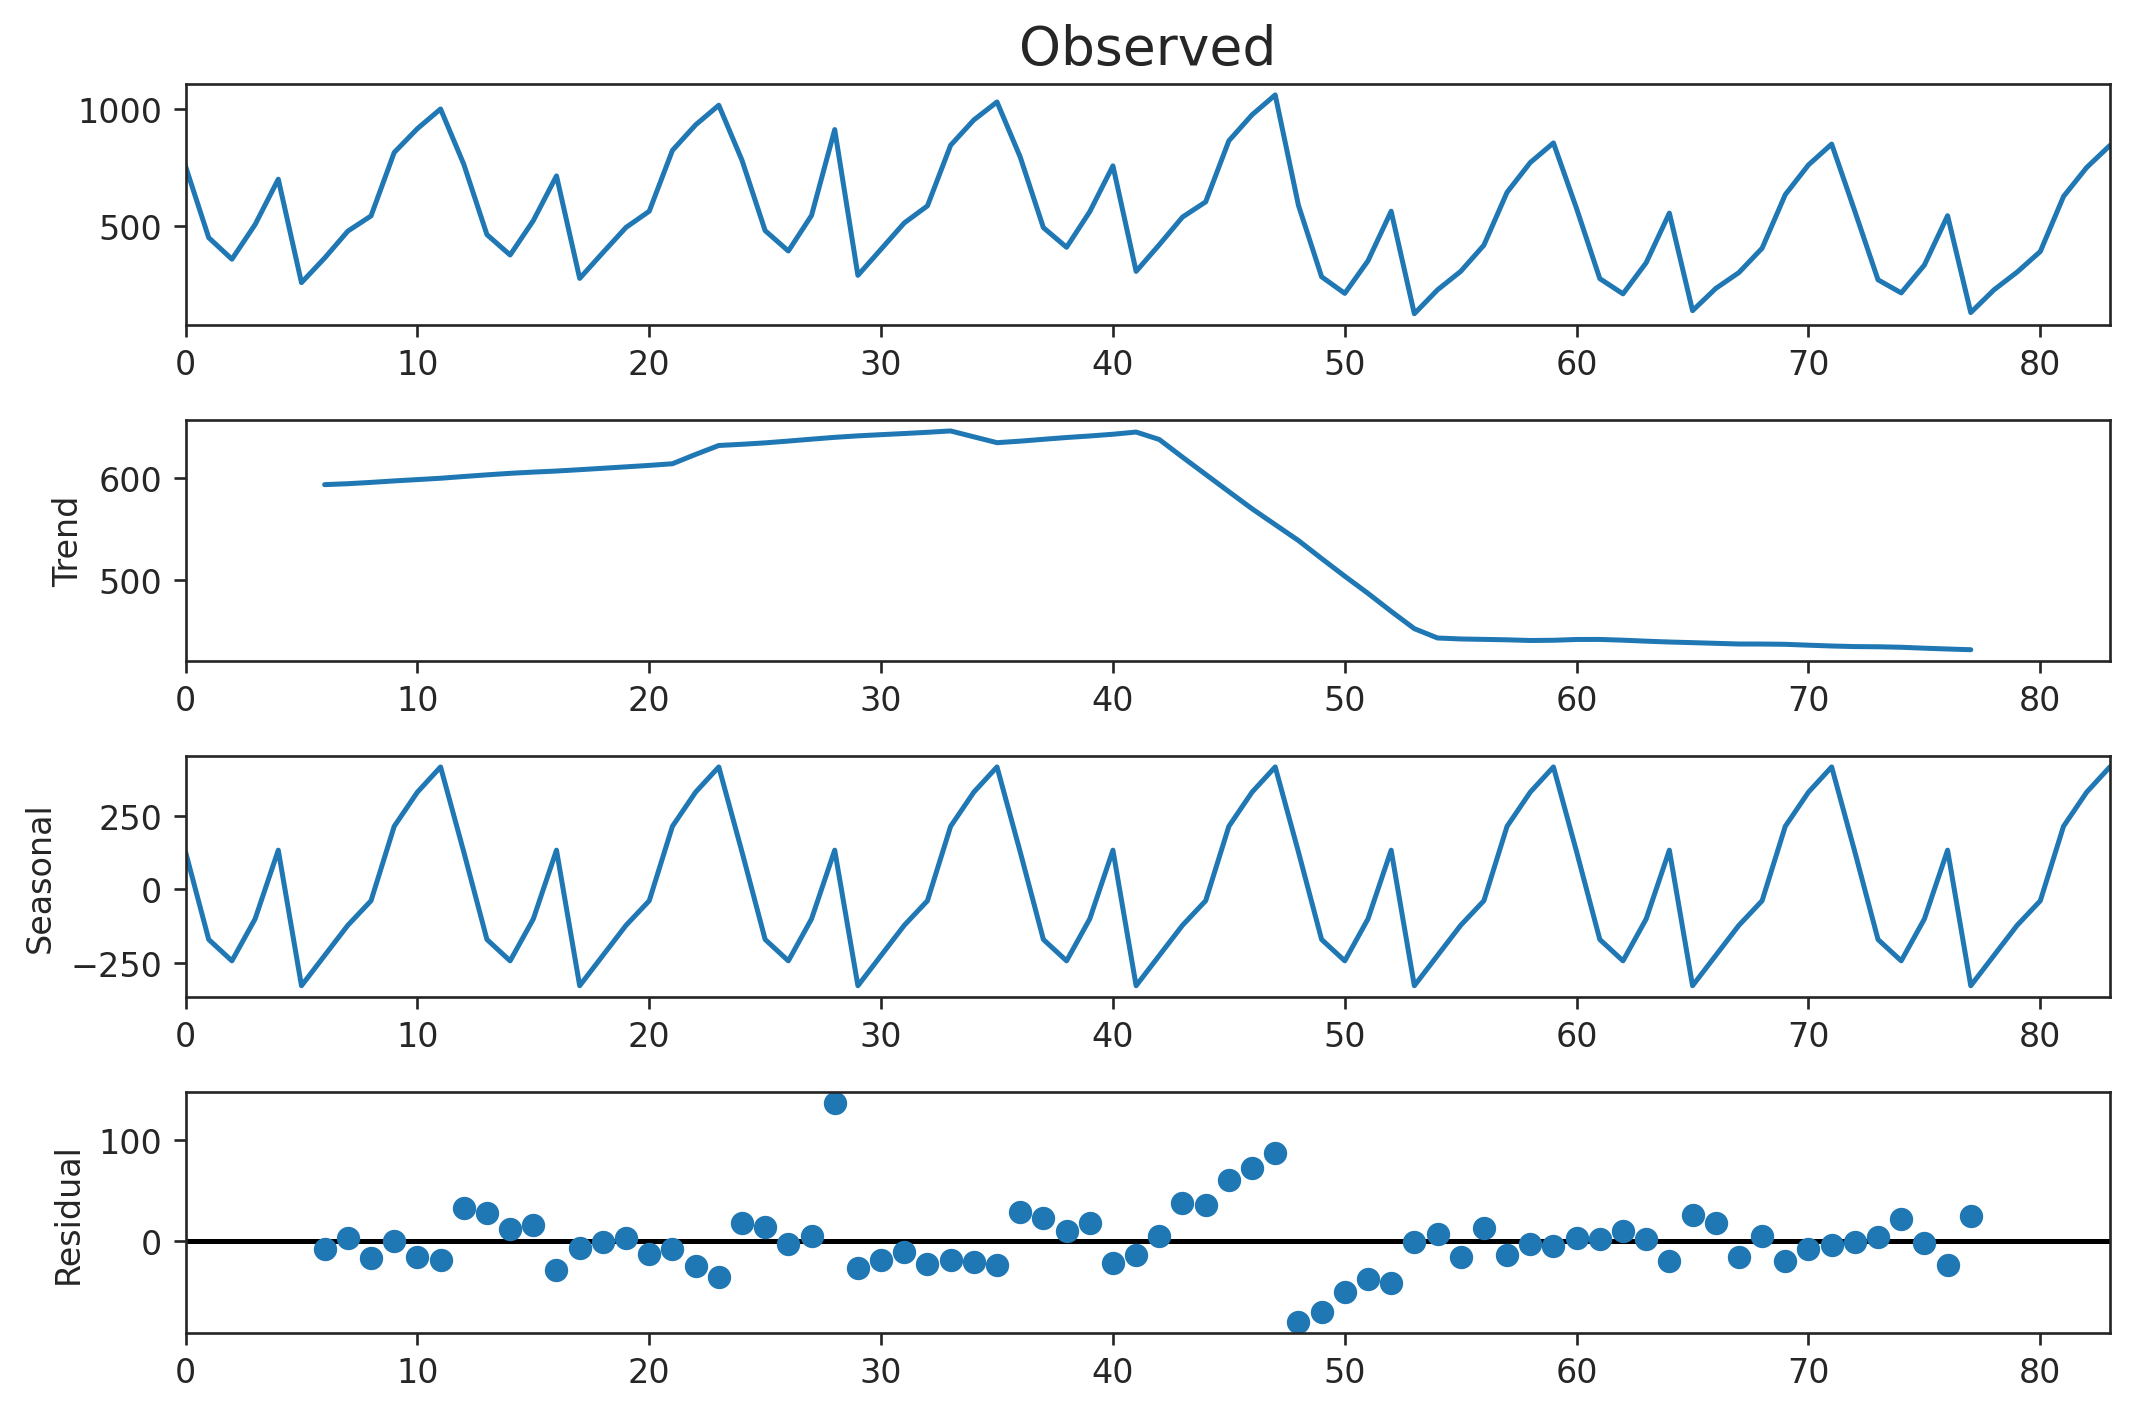

In [ ]:
result = seasonal_decompose(series.values,model='additive',freq=12)
plt.rcParams['figure.figsize'] = [9.0,6.0]
result.plot()
plt.show()

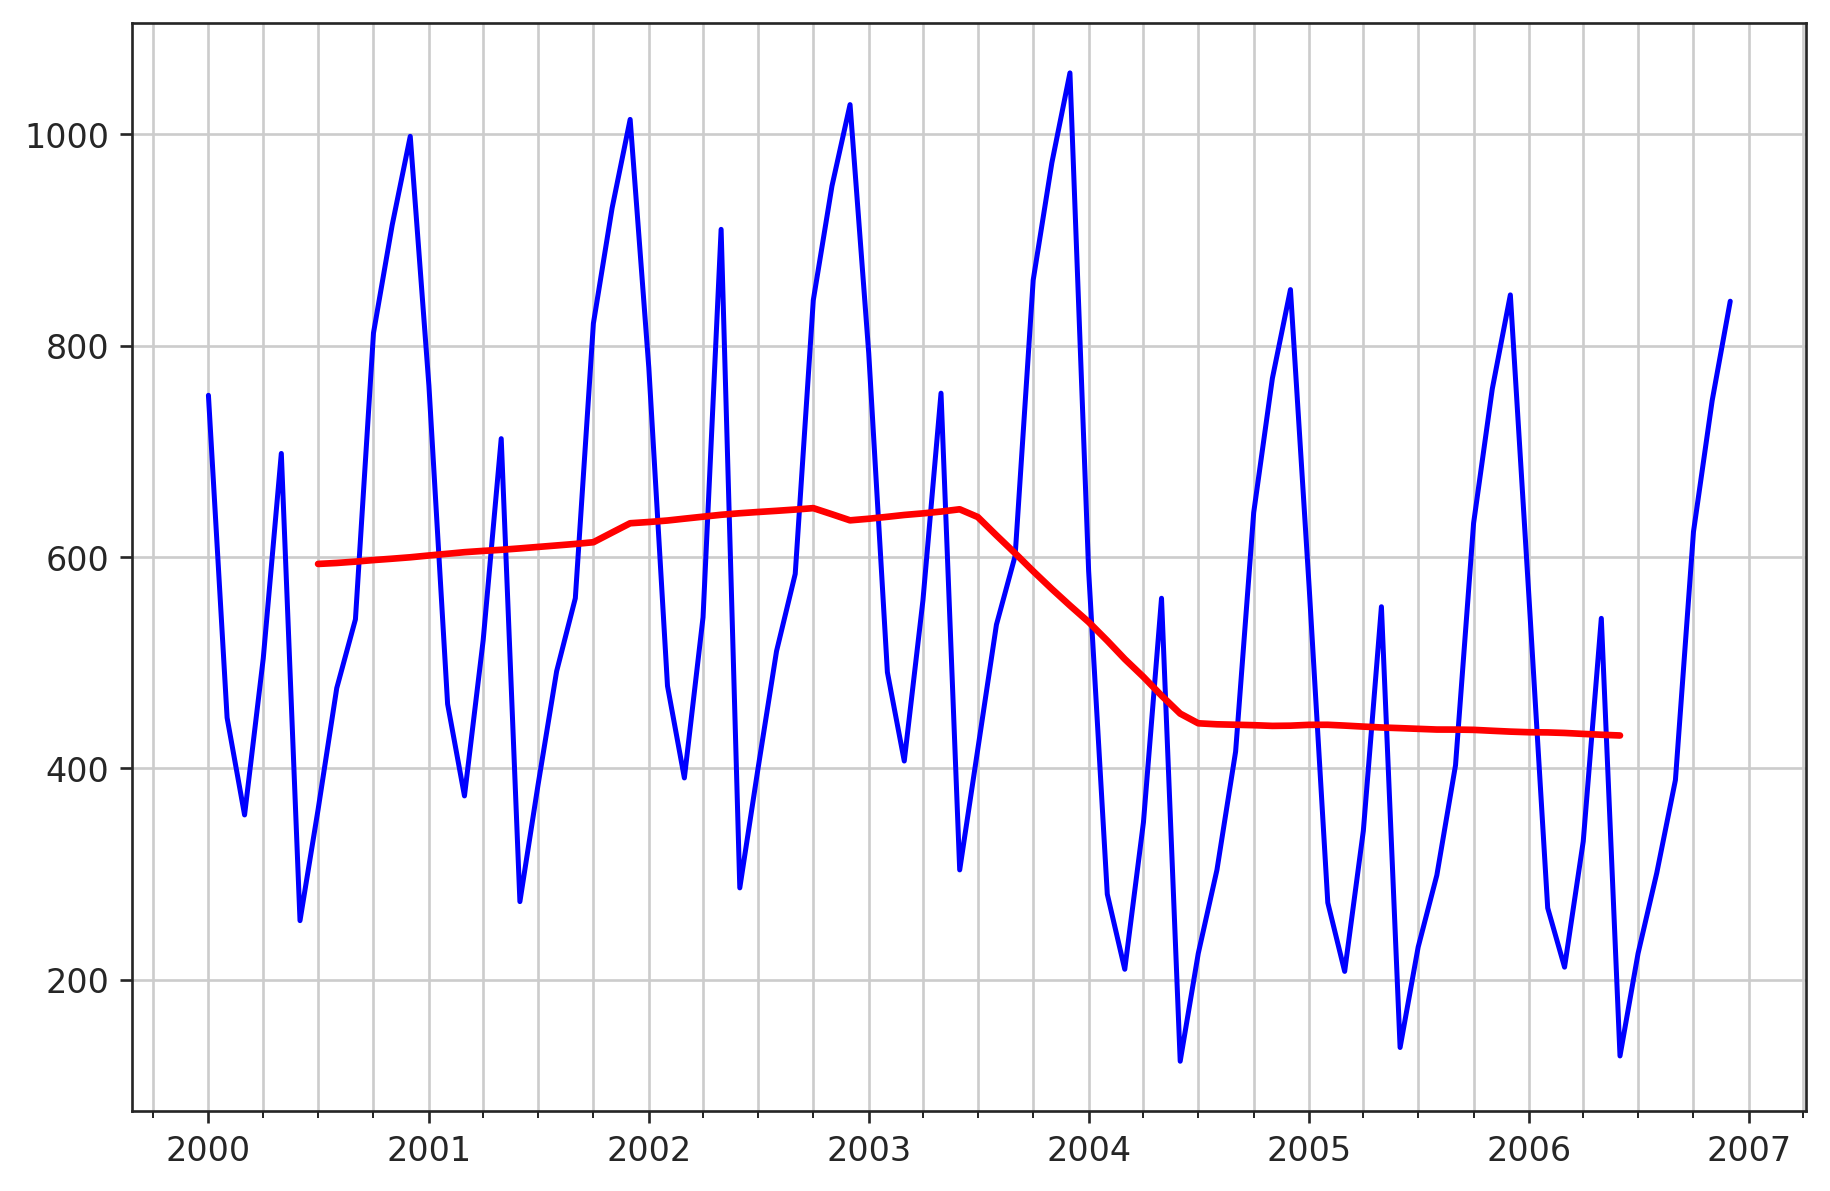

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(series.index, series['Number'], c='blue')
plt.plot(series.index, result.trend, c='red',lw=2)

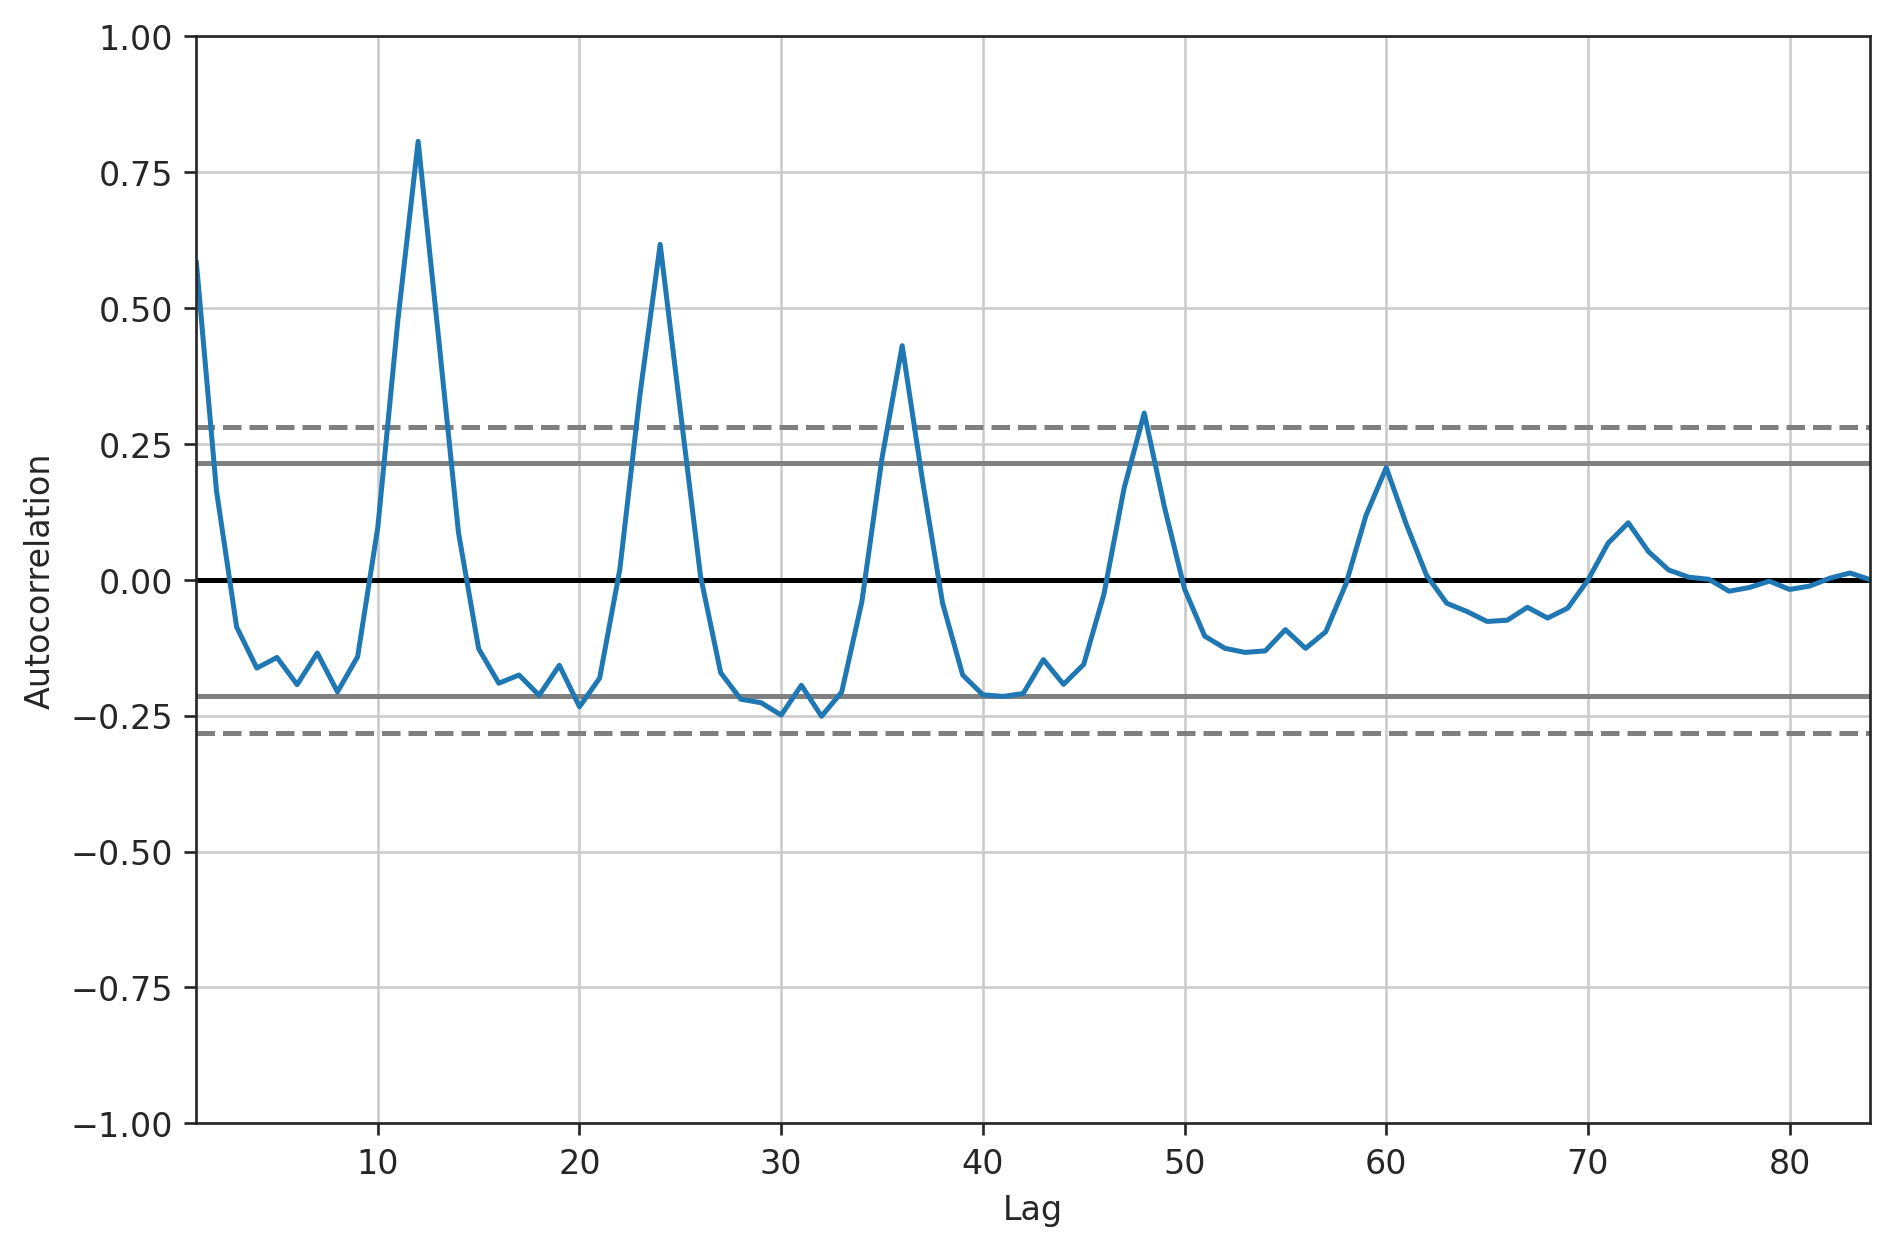

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

autocorrelation_plot(series)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:               D.Number   No. Observations:                   83
Model:                ARIMA(12, 1, 1)   Log Likelihood                -458.442
Method:                       css-mle   S.D. of innovations             50.794
Date:                Mon, 29 Mar 2021   AIC                            946.883
Time:                        19:11:30   BIC                            983.166
Sample:                    02-01-2000   HQIC                           961.460
                         - 12-01-2006                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.8691      2.693     -0.694      0.488      -7.147       3.409
ar.L1.D.Number     -0.1021      0.075     -1.354      0.176      -0.250       0.046
ar.L2.D.Number     -0.1396      

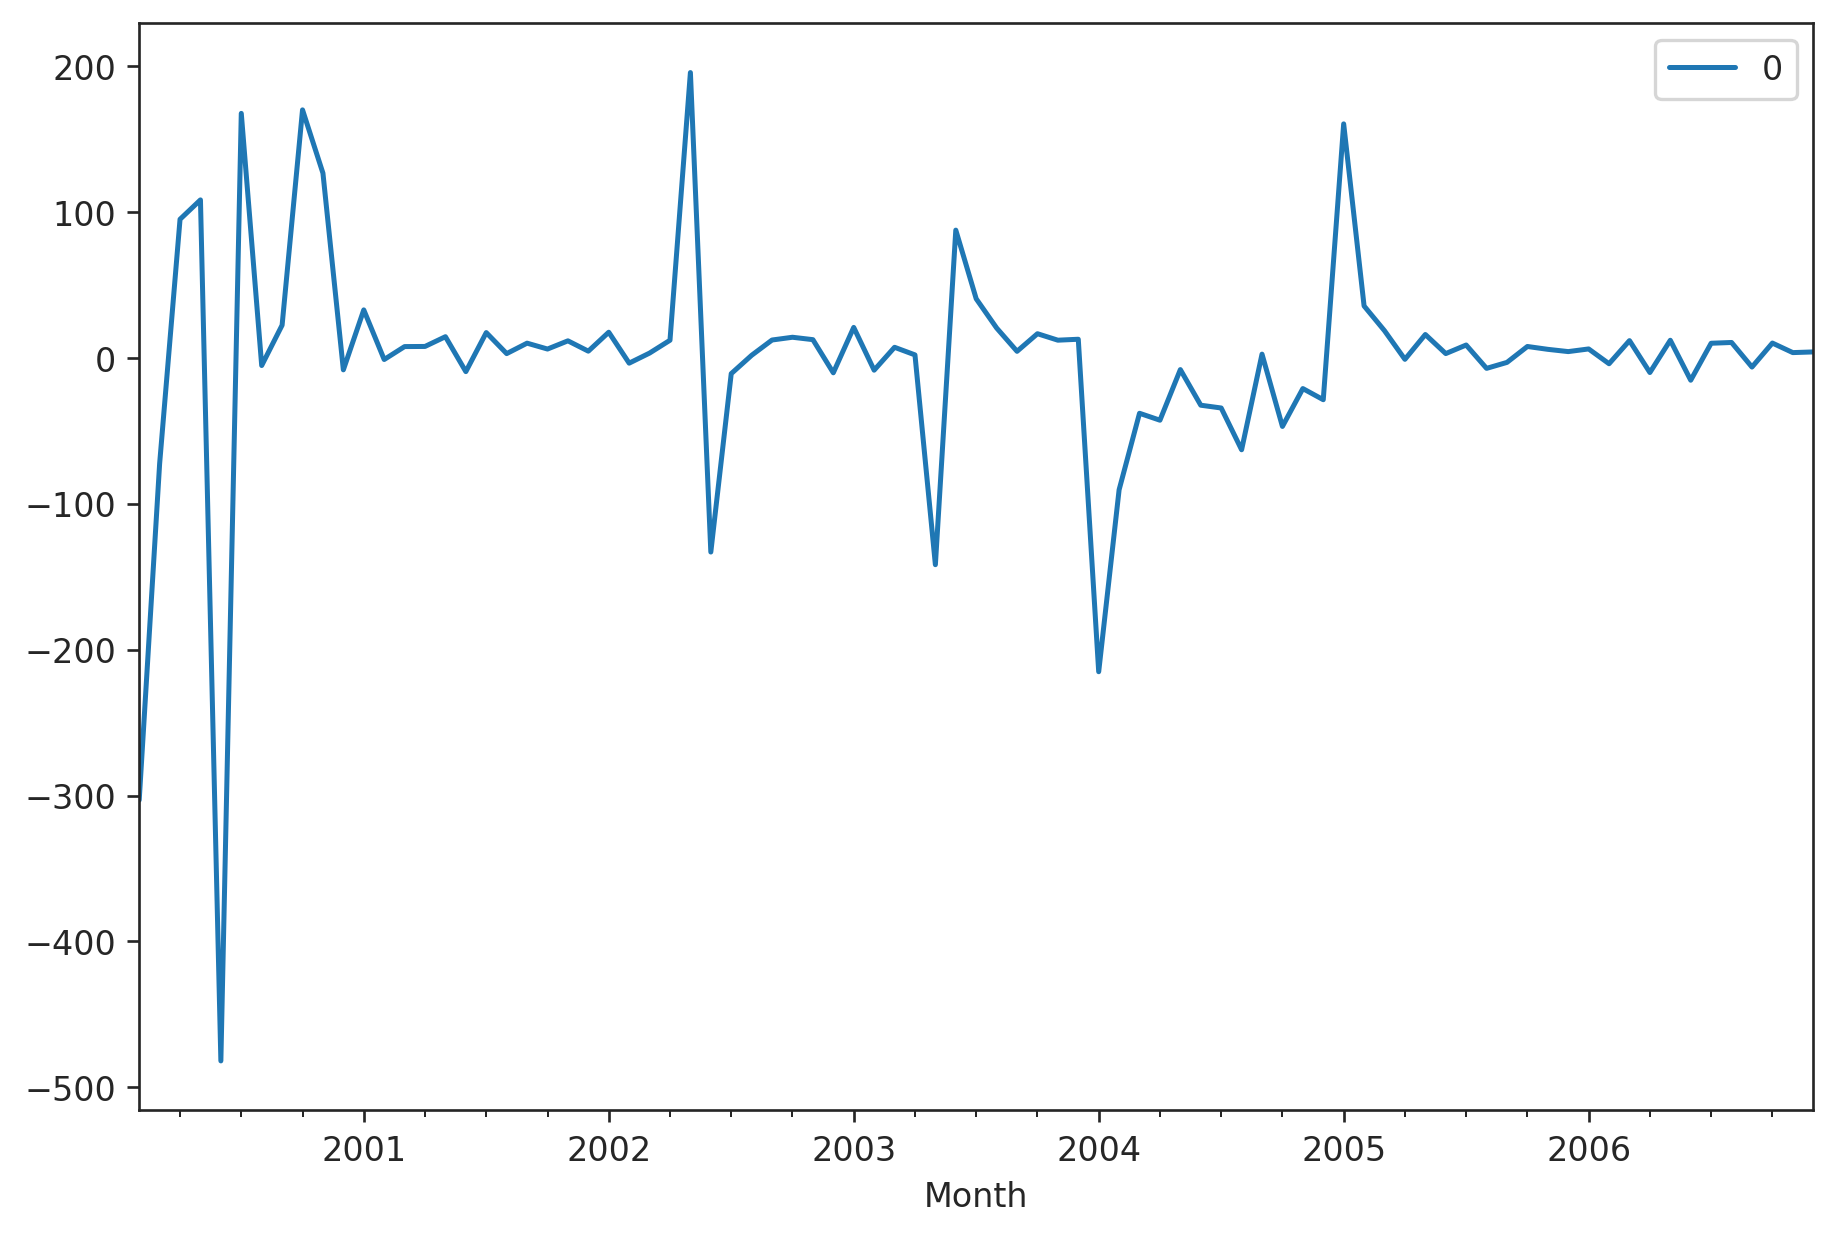

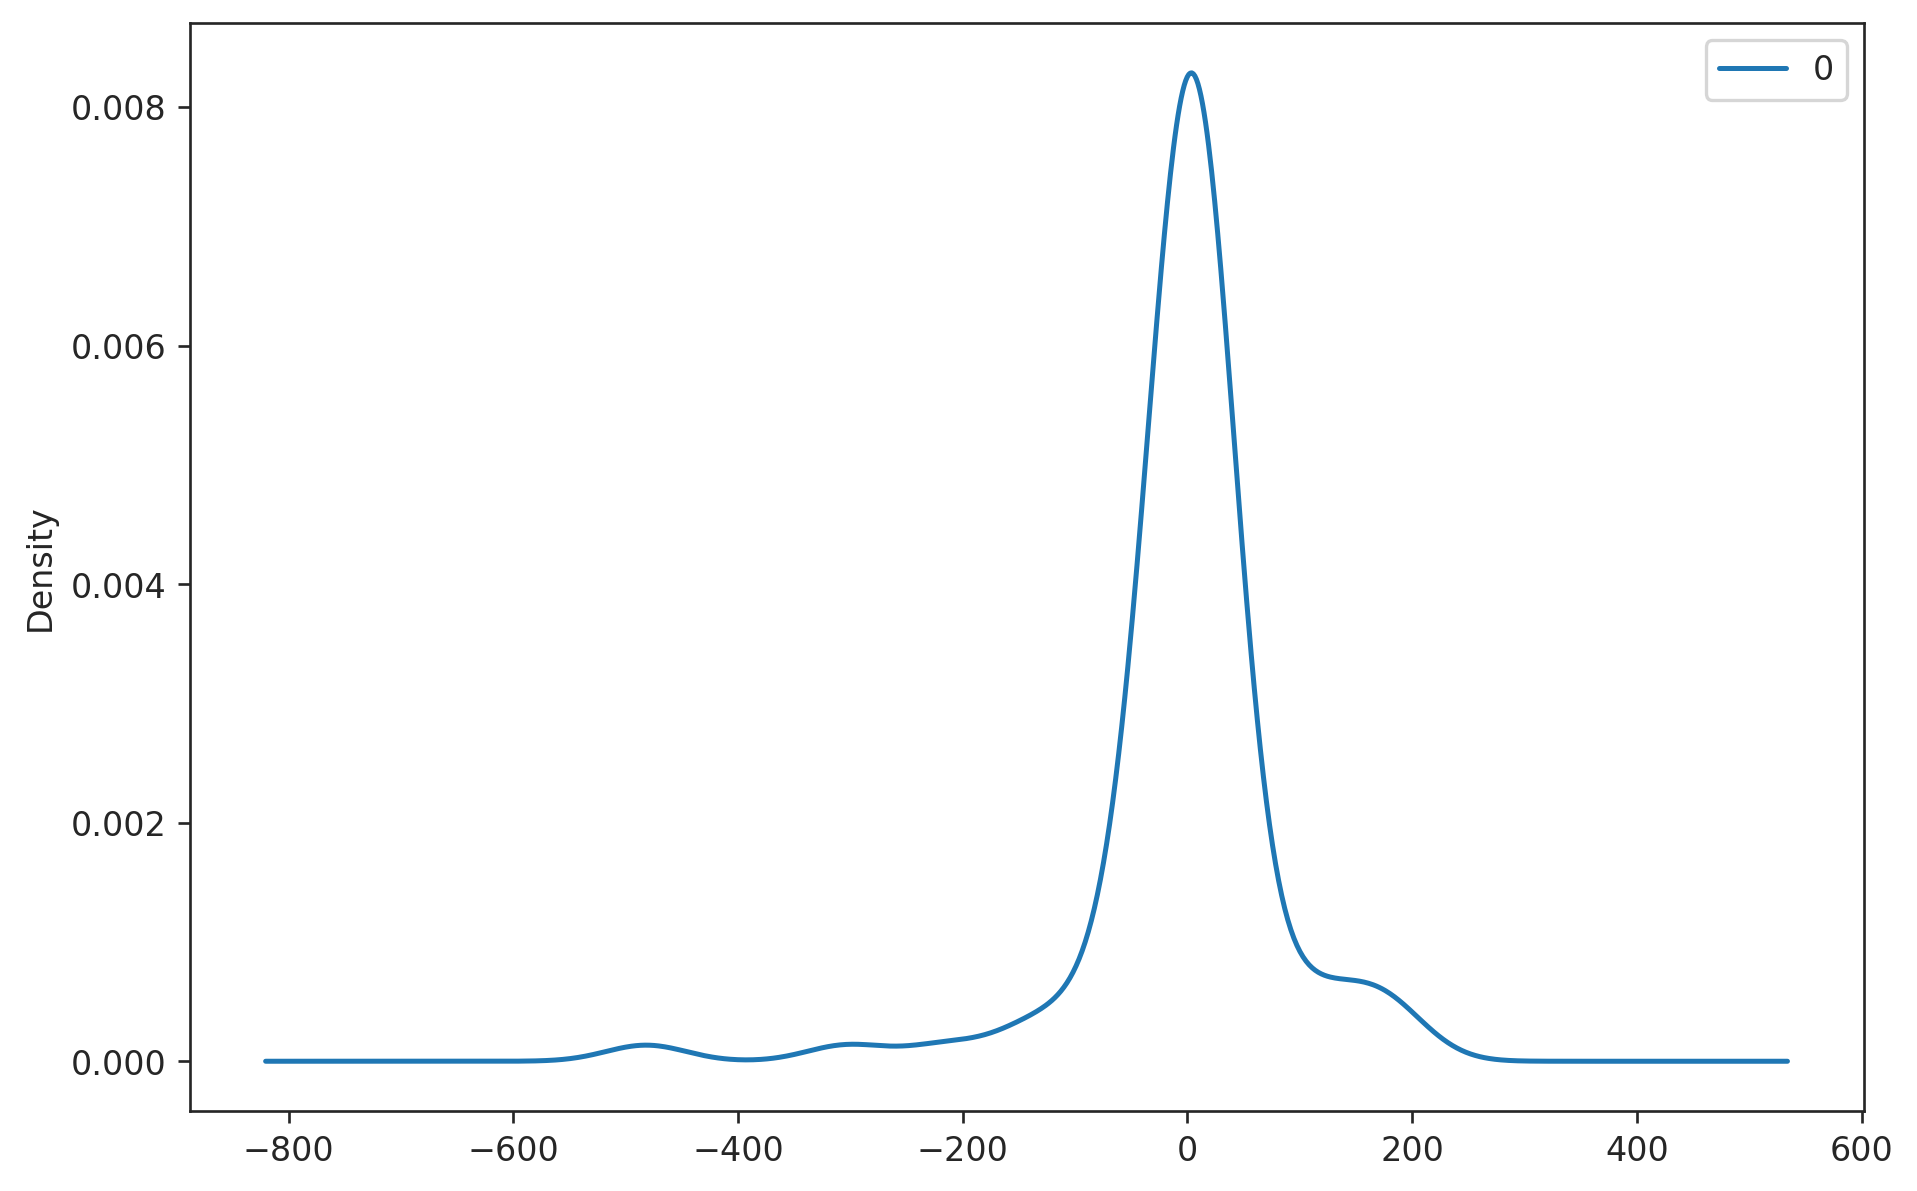

                0
count   83.000000
mean    -2.870062
std     86.200231
min   -481.844912
25%     -8.456473
50%      4.449817
75%     13.300742
max    195.353313


In [ ]:
model = ARIMA(series, order=(12,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())